In [1]:
# supress warnings

import warnings
warnings.filterwarnings('ignore')

# 1. Importing Libraries

In [2]:
# importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

pd.set_option('display.max_columns', None)    # to display all the columns
sns.set(font_scale=1.5)                       # setting permanent style

# 2. Reading Data

In [3]:
# reading country data and printing first 5 rows

data = pd.read_csv("train.csv")
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 3. Cleaning Data

## `Original Shape`

In [4]:
data_initial_rows=len(data)
data_initial_columns=len(data.columns)
print("No. of rows:",data_initial_rows) # no. of rows in data 
print("No. of columns:",data_initial_columns) # no. of columns in data
print("No. of values:",data.size) # no. of cells in data dataframe

No. of rows: 1460
No. of columns: 81
No. of values: 118260


## `Missing Values`

In [5]:
# printing only columns having missing values 

A=dict(data.isnull().sum())
B,C={},{}
for key,val in A.items(): 
    if val!=0:
        #print(key,":",val) ---> column : no. of null values
        B.update({key:val})
        C.update({key:round(val/len(data)*100,2)})

B=pd.Series(B)
C=pd.Series(C)
missing1 = pd.DataFrame(B, columns=['Actual Count'])
missing2 = pd.DataFrame(C, columns=['Percentage'])
missing = pd.concat([missing1, missing2], axis=1 )
missing['Percentage'] = missing['Percentage'].astype(str) + ' %'
missing

,Actual Count,Percentage
LotFrontage,259,17.74 %
Alley,1369,93.77 %
MasVnrType,8,0.55 %
MasVnrArea,8,0.55 %
BsmtQual,37,2.53 %
BsmtCond,37,2.53 %
BsmtExposure,38,2.6 %
BsmtFinType1,37,2.53 %
BsmtFinType2,38,2.6 %
Electrical,1,0.07 %


<div class="alert alert-block alert-info">
<b>Note:</b> 19 Columns have <b>missing</b> values.
</div>

## `Removing Duplicates`

In [6]:
original_shape = data.shape
print("Data shape before:", original_shape)
data.drop_duplicates(inplace = True)       # dropping duplicate if any
print("Data shape after:",data.shape)

Data shape before: (1460, 81)
Data shape after: (1460, 81)


<div class="alert alert-block alert-info">
<b>Note:</b> <b>No duplicates </b>
</div>

## `Dropping Columns`

In [7]:
# dropping columns with high no. of missing values
data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace=True)                # dropping columns

# dropping columns having extremely skewed data distribution and high no. of outliers
data.drop(['Street', 'Utilities', 'LandSlope', 'Condition2'], axis = 1, inplace=True)                      # dropping columns
data.drop(['RoofMatl', 'Heating', 'GarageQual', 'GarageCond'], axis = 1, inplace=True)                     # dropping columns
data.drop(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr'], axis = 1, inplace=True)          # dropping columns
data.drop(['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis = 1, inplace=True)    # dropping columns

# dropping columns that are meaningless or alternative to similar kind of existing column in data
data.drop(['Id', 'BsmtFinType2', 'BsmtCond', 'ExterCond', 'Exterior2nd'], axis = 1, inplace=True)          # dropping columns

<div class="alert alert-block alert-info">
<b>Columns that were dropped here:</b> 
    <ul>either had more than 50% missing values,</ul>
    <ul>or had more than 85% of data as same value throughout the column i.e., extremely skewed and full of outliers,</ul>
    <ul>or were like an alternate columns to already existing column having same information and value counts.</ul>
</div>

## `Imputing Null Values`

In [8]:
Streetfeet = round(data['LotFrontage'].mean(),1)
data['LotFrontage'].replace(np.nan, Streetfeet, inplace=True)                             # filling null values
data['MasVnrType'].replace(np.nan, data['MasVnrType'].mode()[0], inplace=True)            # filling null values
Area = round(data['MasVnrArea'].mean(),1)
data['MasVnrArea'].replace(np.nan, Area, inplace=True)                                    # filling null values
data['BsmtQual'].replace(np.nan, data['BsmtQual'].mode()[0], inplace=True)                # filling null values
data['BsmtExposure'].replace(np.nan, data['BsmtExposure'].mode()[0], inplace=True)        # filling null values
data['BsmtFinType1'].replace(np.nan, data['BsmtFinType1'].mode()[0], inplace=True)        # filling null values
data['Electrical'].replace(np.nan, data['Electrical'].mode()[0], inplace=True)            # filling null values
data['GarageType'].replace(np.nan, data['GarageType'].mode()[0], inplace=True)            # filling null values
data['GarageYrBlt'].replace(np.nan, data['GarageYrBlt'].mode()[0], inplace=True)          # filling null values
data['GarageFinish'].replace(np.nan, data['GarageFinish'].mode()[0], inplace=True)        # filling null values

## `Datatype Conversion`

In [9]:
data['LotFrontage'] = data['LotFrontage'].astype(np.int64)        # converting datatype
data['MasVnrArea'] = data['MasVnrArea'].astype(np.int64)          # converting datatype
data['GarageYrBlt'] = data['GarageYrBlt'].astype(np.int64)        # converting datatype
data['MSSubClass'] = data['MSSubClass'].astype(str)               # converting datatype
data['OverallQual'] = data['OverallQual'].astype(str)             # converting datatype
data['OverallCond'] = data['OverallCond'].astype(str)             # converting datatype

<div class="alert alert-block alert-info">
<b>Note:</b> Some floating point datatype columns were converted into integer and some integer type columns were turned into string type to match the column objective as per data dictionary. 
</div>

## `Data Information`

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   int64 
 3   LotArea        1460 non-null   int64 
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   BldgType       1460 non-null   object
 10  HouseStyle     1460 non-null   object
 11  OverallQual    1460 non-null   object
 12  OverallCond    1460 non-null   object
 13  YearBuilt      1460 non-null   int64 
 14  YearRemodAdd   1460 non-null   int64 
 15  RoofStyle      1460 non-null   object
 16  Exterior1st    1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  MasVnrArea     1460 non-null

## `Boxplots for all Numeric Columns`
### (Outliar Check)

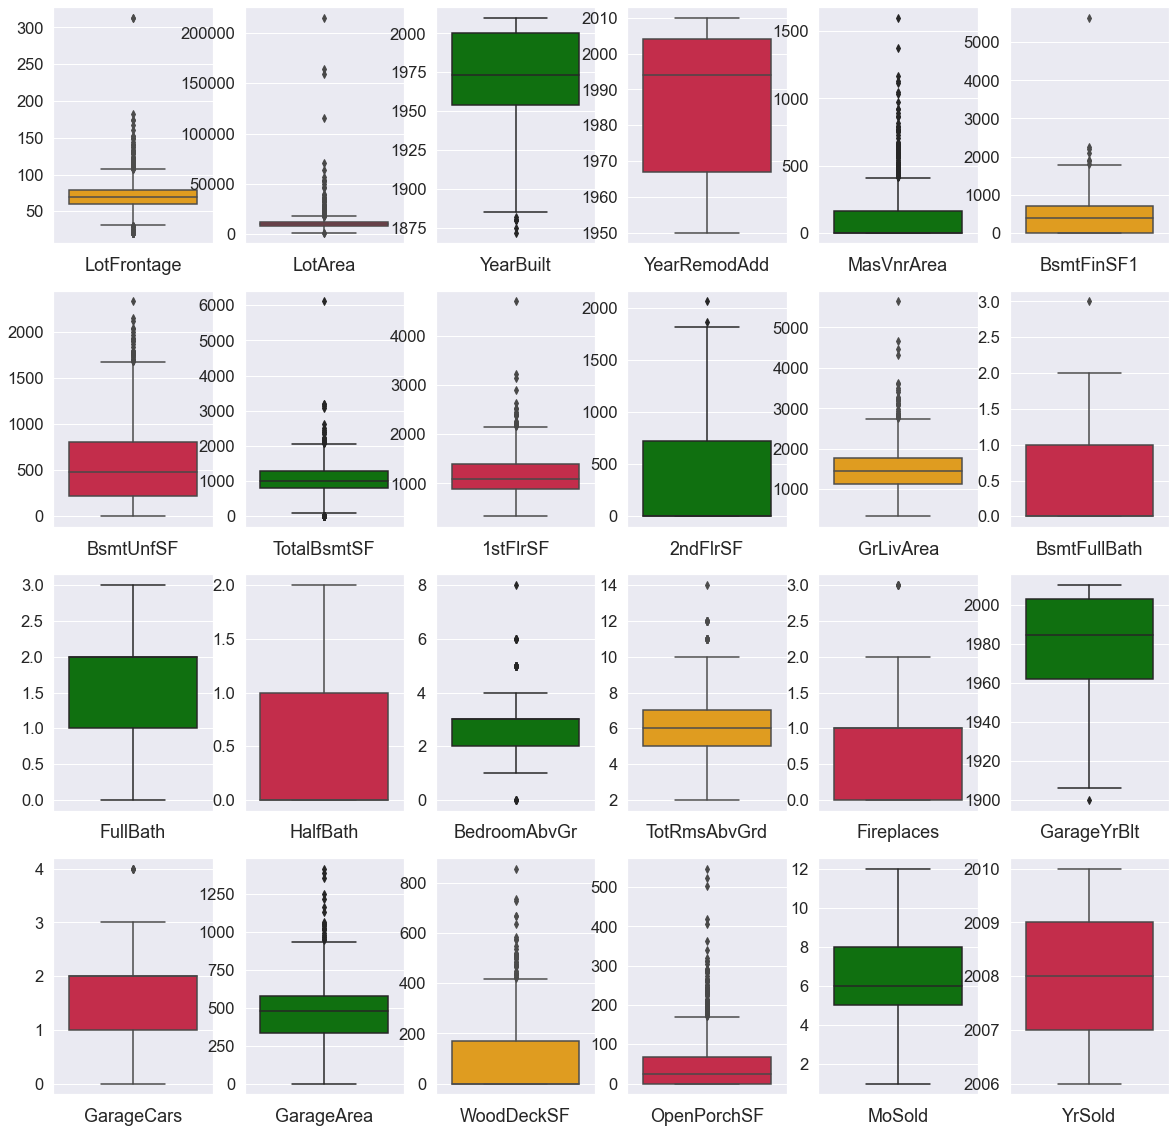

In [11]:
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(4, 6, figsize=(20,20))

sns.boxplot(data['LotFrontage'], ax=ax[0][0], color='orange', orient='v' )
ax[0][0].set(xlabel='LotFrontage', ylabel='')
sns.boxplot(data['LotArea'], ax=ax[0][1], color='crimson', orient='v')
ax[0][1].set(xlabel='LotArea', ylabel='')
sns.boxplot(data['YearBuilt'], ax=ax[0][2], color='green', orient='v')
ax[0][2].set(xlabel='YearBuilt', ylabel='')
sns.boxplot(data['YearRemodAdd'], ax=ax[0][3], color='crimson', orient='v')
ax[0][3].set(xlabel='YearRemodAdd', ylabel='')
sns.boxplot(data['MasVnrArea'], ax=ax[0][4], color='green', orient='v')
ax[0][4].set(xlabel='MasVnrArea', ylabel='')
sns.boxplot(data['BsmtFinSF1'], ax=ax[0][5], color='orange', orient='v' )
ax[0][5].set(xlabel='BsmtFinSF1', ylabel='')

sns.boxplot(data['BsmtUnfSF'], ax=ax[1][0], color='crimson', orient='v')
ax[1][0].set(xlabel='BsmtUnfSF', ylabel='')
sns.boxplot(data['TotalBsmtSF'], ax=ax[1][1], color='green', orient='v')
ax[1][1].set(xlabel='TotalBsmtSF', ylabel='')
sns.boxplot(data['1stFlrSF'], ax=ax[1][2], color='crimson', orient='v')
ax[1][2].set(xlabel='1stFlrSF', ylabel='')
sns.boxplot(data['2ndFlrSF'], ax=ax[1][3], color='green', orient='v')
ax[1][3].set(xlabel='2ndFlrSF', ylabel='')
sns.boxplot(data['GrLivArea'], ax=ax[1][4], color='orange', orient='v' )
ax[1][4].set(xlabel='GrLivArea', ylabel='')
sns.boxplot(data['BsmtFullBath'], ax=ax[1][5], color='crimson', orient='v')
ax[1][5].set(xlabel='BsmtFullBath', ylabel='')

sns.boxplot(data['FullBath'], ax=ax[2][0], color='green', orient='v')
ax[2][0].set(xlabel='FullBath', ylabel='')
sns.boxplot(data['HalfBath'], ax=ax[2][1], color='crimson', orient='v')
ax[2][1].set(xlabel='HalfBath', ylabel='')
sns.boxplot(data['BedroomAbvGr'], ax=ax[2][2], color='green', orient='v')
ax[2][2].set(xlabel='BedroomAbvGr', ylabel='')
sns.boxplot(data['TotRmsAbvGrd'], ax=ax[2][3], color='orange', orient='v' )
ax[2][3].set(xlabel='TotRmsAbvGrd', ylabel='')
sns.boxplot(data['Fireplaces'], ax=ax[2][4], color='crimson', orient='v')
ax[2][4].set(xlabel='Fireplaces', ylabel='')
sns.boxplot(data['GarageYrBlt'], ax=ax[2][5], color='green', orient='v')
ax[2][5].set(xlabel='GarageYrBlt', ylabel='')

sns.boxplot(data['GarageCars'], ax=ax[3][0], color='crimson', orient='v')
ax[3][0].set(xlabel='GarageCars', ylabel='')
sns.boxplot(data['GarageArea'], ax=ax[3][1], color='green', orient='v')
ax[3][1].set(xlabel='GarageArea', ylabel='')
sns.boxplot(data['WoodDeckSF'], ax=ax[3][2], color='orange', orient='v' )
ax[3][2].set(xlabel='WoodDeckSF', ylabel='')
sns.boxplot(data['OpenPorchSF'], ax=ax[3][3], color='crimson', orient='v')
ax[3][3].set(xlabel='OpenPorchSF', ylabel='')
sns.boxplot(data['MoSold'], ax=ax[3][4], color='green', orient='v')
ax[3][4].set(xlabel='MoSold', ylabel='')
sns.boxplot(data['YrSold'], ax=ax[3][5], color='crimson', orient='v')
ax[3][5].set(xlabel='YrSold', ylabel='')

plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Out of all the boxplots, you should notice at:
    <ul>1st row in 2nd, 5th columns <b>LotArea</b> and <b>MasVnrArea</b> have the highest no. of outliers and</ul>
    <ul>last row in 4th column <b>OpenPorchSF</b> also have the highest no. of outliers.</ul><br>
    So these 3 columns should be handled first.
</div>

## `Dropping Outliers`

In [12]:
print("")
print(pd.DataFrame(data['LotArea'].quantile([0.0, 0.25, 0.5, 0.75, 0.95, 1.0])))         # Quantile chart
outliar_cutoff1 = round(tuple(data['LotArea'].quantile([0.95]))[0],2)                    # cutoff = 95th quantile
outliar_count1 = len(data[data['LotArea'] > outliar_cutoff1])                            # no. of outliars found
proportion1 = round((outliar_count1/len(data))*100,2)                                    # %age of data to be removed (outliars)
print(">>>>>>>>>>>>>>>>",outliar_count1,"/",len(data), "=", proportion1,"% outliers")
data.drop(data[data['LotArea'] > outliar_cutoff1].index, inplace = True)                 # dropping outliars

print("")
print(pd.DataFrame(data['MasVnrArea'].quantile([0.0, 0.25, 0.5, 0.75, 0.95, 1.0])))      # Quantile chart
outliar_cutoff2 = round(tuple(data['MasVnrArea'].quantile([0.95]))[0],2)                 # cutoff = 95th quantile
outliar_count2 = len(data[data['MasVnrArea'] > outliar_cutoff2])                         # no. of outliars found
proportion2 = round((outliar_count2/len(data))*100,2)                                    # %age of data to be removed (outliars)
print(">>>>>>>>>>>>>>>>",outliar_count2,"/",len(data), "=", proportion2,"% outliers")                         
data.drop(data[data['MasVnrArea'] > outliar_cutoff2].index, inplace = True)              # dropping outliars

print("")
print(pd.DataFrame(data['OpenPorchSF'].quantile([0.0, 0.25, 0.5, 0.75, 0.95, 1.0])))     # Quantile chart
outliar_cutoff3 = round(tuple(data['OpenPorchSF'].quantile([0.95]))[0],2)                # cutoff = 95th quantile
outliar_count3 = len(data[data['OpenPorchSF'] > outliar_cutoff3])                        # no. of outliars found
proportion3 = round((outliar_count3/len(data))*100,2)                                    # %age of data to be removed (outliars)
print(">>>>>>>>>>>>>>>>",outliar_count3,"/",len(data), "=", proportion3,"% outliers")                         
data.drop(data[data['OpenPorchSF'] > outliar_cutoff3].index, inplace = True)             # dropping outliars

print("")
print(pd.DataFrame(data['LotFrontage'].quantile([0.0, 0.25, 0.5, 0.75, 0.95, 1.0])))     # Quantile chart
outliar_cutoff4 = round(tuple(data['LotFrontage'].quantile([0.95]))[0],2)                # cutoff = 95th quantile
outliar_count4 = len(data[data['LotFrontage'] > outliar_cutoff4])                        # no. of outliars found
proportion4 = round((outliar_count4/len(data))*100,2)                                    # %age of data to be removed (outliars)
print(">>>>>>>>>>>>>>>>",outliar_count4,"/",len(data), "=", proportion4,"% outliers")                         
data.drop(data[data['LotFrontage'] > outliar_cutoff4].index, inplace = True)             # dropping outliars

print("\n=========================================================\n")
Total_rows = outliar_count1 + outliar_count2 + outliar_count3 + outliar_count4
percent = round(Total_rows/data_initial_rows*100,2)
print(outliar_count1,"+",outliar_count2,"+",outliar_count3,"+",outliar_count4, "=",Total_rows,"rows removed. (",percent,"%)")
print("Original Shape=", original_shape, "\nCurrent Shape =", data.shape)


        LotArea
0.00    1300.00
0.25    7553.50
0.50    9478.50
0.75   11601.50
0.95   17401.15
1.00  215245.00
>>>>>>>>>>>>>>>> 73 / 1460 = 5.0 % outliers

      MasVnrArea
0.00         0.0
0.25         0.0
0.50         0.0
0.75       163.5
0.95       440.8
1.00      1600.0
>>>>>>>>>>>>>>>> 70 / 1387 = 5.05 % outliers

      OpenPorchSF
0.00          0.0
0.25          0.0
0.50         23.0
0.75         64.0
0.95        168.2
1.00        547.0
>>>>>>>>>>>>>>>> 66 / 1317 = 5.01 % outliers

      LotFrontage
0.00         21.0
0.25         60.0
0.50         70.0
0.75         77.0
0.95         98.5
1.00        182.0
>>>>>>>>>>>>>>>> 63 / 1251 = 5.04 % outliers


73 + 70 + 66 + 63 = 272 rows removed. ( 18.63 %)
Original Shape= (1460, 81) 
Current Shape = (1188, 54)


<div class="alert alert-block alert-info">
<b>Note:</b>  272 rows i.e., 18.63 % data (outliers) were removed.
</div>

<div class="alert alert-block alert-danger">
<b>Note:</b> <b>At the final stage we have come down to 54 columns from 81 and 1188 rows from 1460 after cleaning the dataset.</b>
</div>

## `Outlier Recheck`

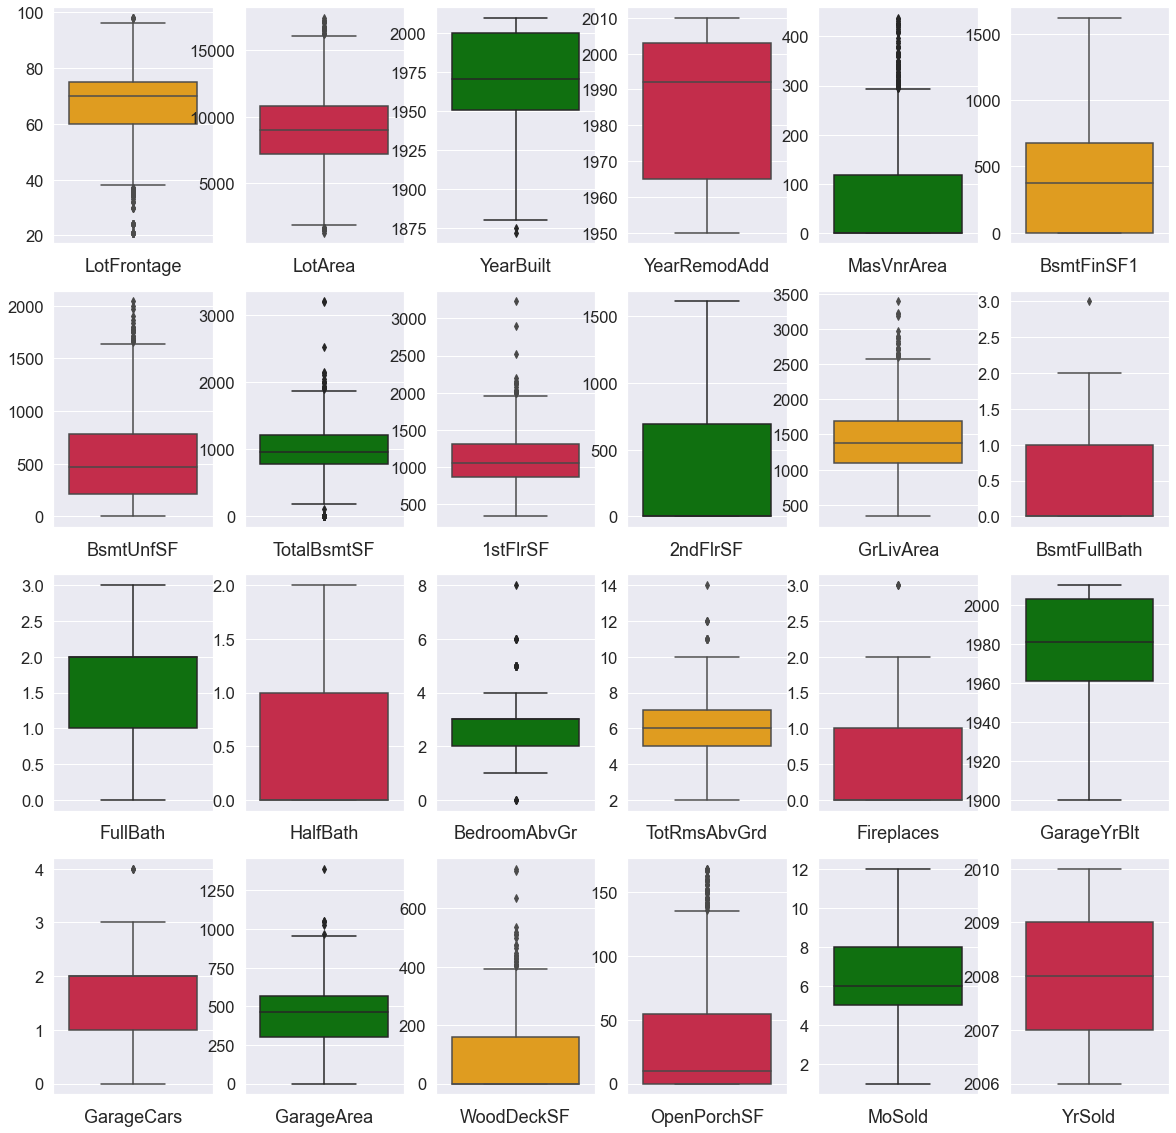

In [13]:
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(4, 6, figsize=(20,20))

sns.boxplot(data['LotFrontage'], ax=ax[0][0], color='orange', orient='v' )
ax[0][0].set(xlabel='LotFrontage', ylabel='')
sns.boxplot(data['LotArea'], ax=ax[0][1], color='crimson', orient='v')
ax[0][1].set(xlabel='LotArea', ylabel='')
sns.boxplot(data['YearBuilt'], ax=ax[0][2], color='green', orient='v')
ax[0][2].set(xlabel='YearBuilt', ylabel='')
sns.boxplot(data['YearRemodAdd'], ax=ax[0][3], color='crimson', orient='v')
ax[0][3].set(xlabel='YearRemodAdd', ylabel='')
sns.boxplot(data['MasVnrArea'], ax=ax[0][4], color='green', orient='v')
ax[0][4].set(xlabel='MasVnrArea', ylabel='')
sns.boxplot(data['BsmtFinSF1'], ax=ax[0][5], color='orange', orient='v' )
ax[0][5].set(xlabel='BsmtFinSF1', ylabel='')

sns.boxplot(data['BsmtUnfSF'], ax=ax[1][0], color='crimson', orient='v')
ax[1][0].set(xlabel='BsmtUnfSF', ylabel='')
sns.boxplot(data['TotalBsmtSF'], ax=ax[1][1], color='green', orient='v')
ax[1][1].set(xlabel='TotalBsmtSF', ylabel='')
sns.boxplot(data['1stFlrSF'], ax=ax[1][2], color='crimson', orient='v')
ax[1][2].set(xlabel='1stFlrSF', ylabel='')
sns.boxplot(data['2ndFlrSF'], ax=ax[1][3], color='green', orient='v')
ax[1][3].set(xlabel='2ndFlrSF', ylabel='')
sns.boxplot(data['GrLivArea'], ax=ax[1][4], color='orange', orient='v' )
ax[1][4].set(xlabel='GrLivArea', ylabel='')
sns.boxplot(data['BsmtFullBath'], ax=ax[1][5], color='crimson', orient='v')
ax[1][5].set(xlabel='BsmtFullBath', ylabel='')

sns.boxplot(data['FullBath'], ax=ax[2][0], color='green', orient='v')
ax[2][0].set(xlabel='FullBath', ylabel='')
sns.boxplot(data['HalfBath'], ax=ax[2][1], color='crimson', orient='v')
ax[2][1].set(xlabel='HalfBath', ylabel='')
sns.boxplot(data['BedroomAbvGr'], ax=ax[2][2], color='green', orient='v')
ax[2][2].set(xlabel='BedroomAbvGr', ylabel='')
sns.boxplot(data['TotRmsAbvGrd'], ax=ax[2][3], color='orange', orient='v' )
ax[2][3].set(xlabel='TotRmsAbvGrd', ylabel='')
sns.boxplot(data['Fireplaces'], ax=ax[2][4], color='crimson', orient='v')
ax[2][4].set(xlabel='Fireplaces', ylabel='')
sns.boxplot(data['GarageYrBlt'], ax=ax[2][5], color='green', orient='v')
ax[2][5].set(xlabel='GarageYrBlt', ylabel='')

sns.boxplot(data['GarageCars'], ax=ax[3][0], color='crimson', orient='v')
ax[3][0].set(xlabel='GarageCars', ylabel='')
sns.boxplot(data['GarageArea'], ax=ax[3][1], color='green', orient='v')
ax[3][1].set(xlabel='GarageArea', ylabel='')
sns.boxplot(data['WoodDeckSF'], ax=ax[3][2], color='orange', orient='v' )
ax[3][2].set(xlabel='WoodDeckSF', ylabel='')
sns.boxplot(data['OpenPorchSF'], ax=ax[3][3], color='crimson', orient='v')
ax[3][3].set(xlabel='OpenPorchSF', ylabel='')
sns.boxplot(data['MoSold'], ax=ax[3][4], color='green', orient='v')
ax[3][4].set(xlabel='MoSold', ylabel='')
sns.boxplot(data['YrSold'], ax=ax[3][5], color='crimson', orient='v')
ax[3][5].set(xlabel='YrSold', ylabel='')

plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b>  Now all the numeric columns have tolerable amount of outliers, having fair balance within the range.
</div>

## `Cleaned Dataset`

In [14]:
data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,60,RL,62,7917,Reg,Lvl,Inside,Gilbert,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,None,0,TA,PConc,Gd,No,Unf,0,953,953,Ex,Y,SBrkr,953,694,1647,0,2,1,3,TA,7,Typ,1,Attchd,1999,RFn,2,460,Y,0,40,8,2007,WD,Normal,175000
1456,20,RL,85,13175,Reg,Lvl,Inside,NWAmes,Norm,1Fam,1Story,6,6,1978,1988,Gable,Plywood,Stone,119,TA,CBlock,Gd,No,ALQ,790,589,1542,TA,Y,SBrkr,2073,0,2073,1,2,0,3,TA,7,Min1,2,Attchd,1978,Unf,2,500,Y,349,0,2,2010,WD,Normal,210000
1457,70,RL,66,9042,Reg,Lvl,Inside,Crawfor,Norm,1Fam,2Story,7,9,1941,2006,Gable,CemntBd,None,0,Ex,Stone,TA,No,GLQ,275,877,1152,Ex,Y,SBrkr,1188,1152,2340,0,2,0,4,Gd,9,Typ,2,Attchd,1941,RFn,1,252,Y,0,60,5,2010,WD,Normal,266500
1458,20,RL,68,9717,Reg,Lvl,Inside,NAmes,Norm,1Fam,1Story,5,6,1950,1996,Hip,MetalSd,None,0,TA,CBlock,TA,Mn,GLQ,49,0,1078,Gd,Y,FuseA,1078,0,1078,1,1,0,2,Gd,5,Typ,0,Attchd,1950,Unf,1,240,Y,366,0,4,2010,WD,Normal,142125
1459,20,RL,75,9937,Reg,Lvl,Inside,Edwards,Norm,1Fam,1Story,5,6,1965,1965,Gable,HdBoard,None,0,Gd,CBlock,TA,No,BLQ,830,136,1256,Gd,Y,SBrkr,1256,0,1256,1,1,1,3,TA,6,Typ,0,Attchd,1965,Fin,1,276,Y,736,68,6,2008,WD,Normal,147500


## `Description`

In [15]:
data.describe(include = ['O'])

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
count,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188
unique,15,5,4,4,5,25,9,5,8,10,9,5,15,4,4,6,4,4,6,5,2,5,4,6,6,3,3,9,6
top,20,RL,Reg,Lvl,Inside,NAmes,Norm,1Fam,1Story,5,5,Gable,VinylSd,None,TA,CBlock,TA,No,Unf,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,Y,WD,Normal
freq,432,924,800,1084,895,197,1029,979,603,352,649,962,408,753,776,525,589,843,388,573,1106,1072,629,1105,757,605,1087,1042,984


In [16]:
data.describe() 

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,65.867845,8931.450337,1969.853535,1983.927609,68.603535,413.319865,547.223064,1002.320707,1111.432660,313.111111,1429.028620,0.407407,1.510101,0.351010,2.834175,6.339226,0.529461,1978.982323,1.683502,446.734007,87.132997,33.106061,6.308923,2007.824074,167212.776936
std,15.191899,3026.652499,30.175847,20.929532,109.210332,399.633364,421.814474,386.103601,339.127559,403.355961,445.042312,0.510063,0.531152,0.496516,0.803495,1.514405,0.614326,25.122256,0.731409,201.248747,115.134912,42.920614,2.676873,1.337752,62996.403716
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,60.000000,7200.000000,1950.750000,1965.000000,0.000000,0.000000,211.500000,780.000000,864.000000,0.000000,1092.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1961.000000,1.000000,301.000000,0.000000,0.000000,5.000000,2007.000000,126418.750000
50%,70.000000,9000.000000,1971.000000,1992.000000,0.000000,376.000000,465.500000,952.500000,1050.000000,0.000000,1382.500000,0.000000,2.000000,0.000000,3.000000,6.000000,0.000000,1981.000000,2.000000,460.000000,0.000000,9.500000,6.000000,2008.000000,154000.000000
75%,75.000000,10771.250000,2000.000000,2003.000000,117.000000,679.250000,783.000000,1216.500000,1309.250000,689.000000,1694.500000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2003.000000,2.000000,564.000000,160.000000,54.250000,8.000000,2009.000000,196000.000000
max,98.000000,17400.000000,2010.000000,2010.000000,438.000000,1619.000000,2042.000000,3206.000000,3228.000000,1611.000000,3395.000000,3.000000,3.000000,2.000000,8.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,168.000000,12.000000,2010.000000,556581.000000


# <span style="color: blue;"> 4. Univariate Analysis </span>

## 4.1 Categorical Data

### Analysis for 'BldgType' column

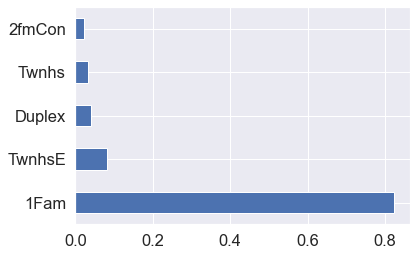

In [17]:
data['BldgType'].value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Type of dwelling</b><br>  
    <li><b>1Fam:</b>	Single-family Detached<b> (Max)</b> - more than 80%</li>	
    <li><b>2FmCon:</b>	Two-family Conversion</li>
    <li><b>Duplx:</b>	Duplex</li>
    <li><b>TwnhsE:</b>	Townhouse End Unit</li>
    <li><b>Twnhs:</b>	Townhouse Inside Unit</li>
</div>

### Analysis for 'HouseStyle' column

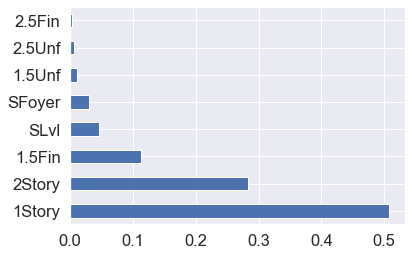

In [18]:
data['HouseStyle'].value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Style of dwelling</b><br>  
    <li><b>1Story:</b> One story<b>(Max)</b> - more than 50%</li>	
    <li><b>2Story:</b> Two story</li>
    <li><b>1.5Fin:</b> One and one-half story: 2nd level finished</li>
    <li><b>SLvl:</b> Split Level</li>
    <li><b>SFoyer:</b> Split Foyer</li>
    <li><b>1.5Unf:</b> One and one-half story: 2nd level unfinished</li>
    <li><b>2.5Fin:</b> Two and one-half story: 2nd level finished</li>
    <li><b>2.5Unf</b> Two and one-half story: 2nd level unfinished</li>
</div>

### Analysis for 'RoofStyle' column

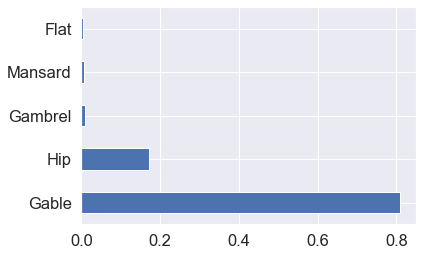

In [19]:
data['RoofStyle'].value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Type of roof</b><br>  
    <li><b>Gable: </b>Gable	<b>(Max)</b> - about 80%</li>	
    <li><b>Flat: </b>Flat</li>
    <li><b>Gambrel: </b>Gambrel</li>
    <li><b>Hip: </b>Hip</li>
    <li><b>Mansard: </b>Mansard</li>
</div>

### Analysis for 'Neighborhood' column

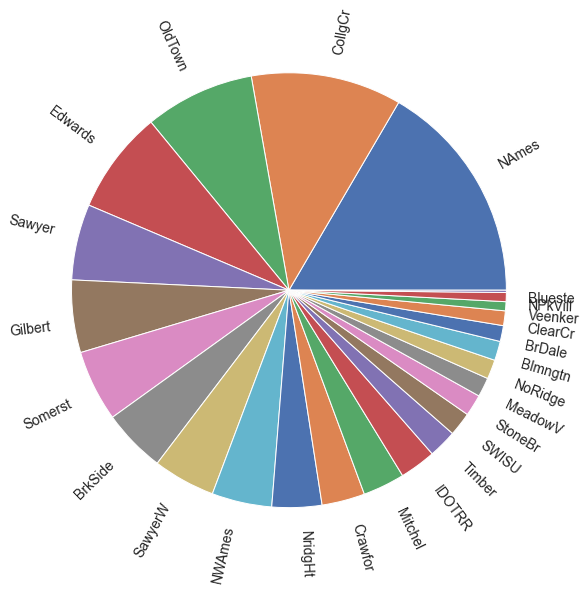

In [20]:
plt.figure(figsize=[10,10])
data['Neighborhood'].value_counts(normalize=True).plot.pie(textprops={'fontsize': 14}, rotatelabels=True, label='')
plt.show()

<div class="alert alert-block alert-info">
<b>Neighborhood - Physical locations within Ames city limits</b><br>  
    <li><b>NAmes: </b>North Ames	<b>(Max)</b> - about 17%</li>		
    <li><b>Blmngtn: </b>Bloomington Heights</li>
    <li><b>Blueste: </b>Bluestem</li>
    <li><b>BrDale: </b>Briardale</li>
    <li><b>BrkSide: </b>Brookside</li>
    <li><b>ClearCr: </b>Clear Creek</li>
    <li><b>CollgCr: </b>College Creek</li>
    <li><b>Crawfor: </b>Crawford</li>
    <li><b>Edwards: </b>Edwards</li>
    <li><b>Gilbert: </b>Gilbert</li>
    <li><b>IDOTRR: </b>Iowa DOT and Rail Road</li>
    <li><b>MeadowV: </b>Meadow Village</li>
    <li><b>Mitchel: </b>Mitchell</li>
    <li><b>NoRidge: </b>Northridge</li>
    <li><b>NPkVill: </b>Northpark Villa</li>
    <li><b>NridgHt: </b>Northridge Heights</li>
    <li><b>NWAmes: </b>Northwest Ames</li>
    <li><b>OldTown: </b>OldTown</li>
    <li><b>SWISU: </b>South & West of Iowa State University</li>
    <li><b>Sawyer: </b>Sawyer</li>
    <li><b>SawyerW: </b>Sawyer West</li>
    <li><b>Somerst: </b>Somerset</li>
    <li><b>StoneBr: </b>Stone Brook</li>
    <li><b>Timber: </b>Timberland</li>
    <li><b>Veenker: </b>Veenker</li>
</div>

### Analysis for 'GarageType' column

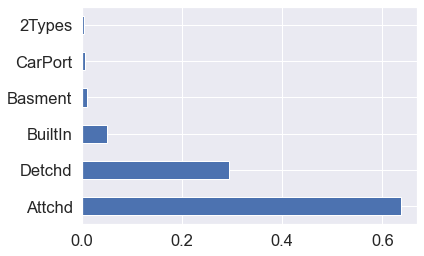

In [21]:
data['GarageType'].value_counts(normalize=True).plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Garage location</b><br>  
    <li><b>Attchd: </b>Attached to home<b> (Max)</b> - more than 60%</li>	
    <li><b>2Types: </b>More than one type of garage</li>
    <li><b>Basment: </b>Basement Garage</li>
    <li><b>BuiltIn: </b>Built-In (Garage part of house - typically has room above garage)</li>
    <li><b>CarPort: </b>Car Port</li>
    <li><b>Detchd: </b>Detached from home</li>
</div>

## 4.2 Numerical data

### Analysis for all numerical columns

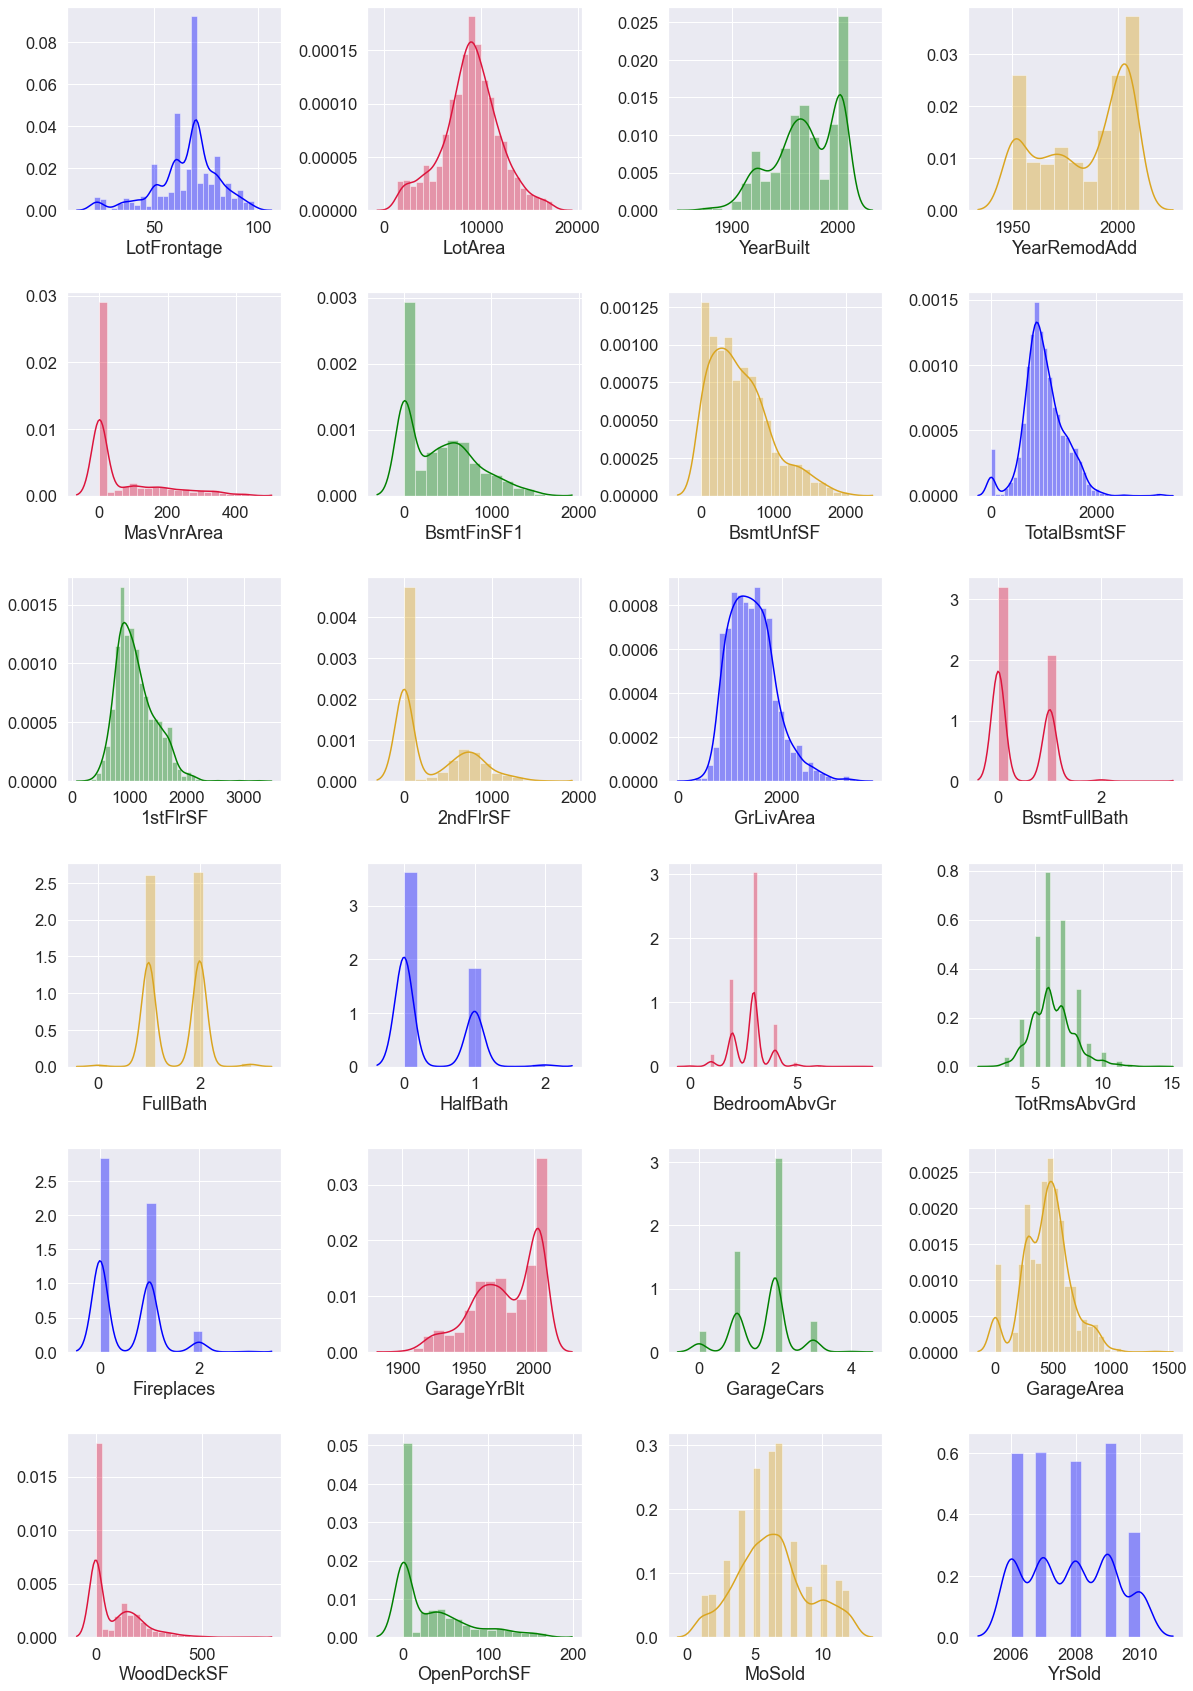

In [22]:
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(6, 4, figsize=(20, 30))

sns.distplot(data['LotFrontage'], ax=ax[0][0], color='blue')
ax[0][0].set(xlabel='LotFrontage', ylabel='')
sns.distplot(data['LotArea'], ax=ax[0][1], color='crimson')
ax[0][1].set(xlabel='LotArea', ylabel='')
sns.distplot(data['YearBuilt'], ax=ax[0][2], color='green')
ax[0][2].set(xlabel='YearBuilt', ylabel='')
sns.distplot(data['YearRemodAdd'], ax=ax[0][3], color='goldenrod')
ax[0][3].set(xlabel='YearRemodAdd', ylabel='')

sns.distplot(data['MasVnrArea'], ax=ax[1][0], color='crimson')
ax[1][0].set(xlabel='MasVnrArea', ylabel='')
sns.distplot(data['BsmtFinSF1'], ax=ax[1][1], color='green')
ax[1][1].set(xlabel='BsmtFinSF1', ylabel='')
sns.distplot(data['BsmtUnfSF'], ax=ax[1][2], color='goldenrod')
ax[1][2].set(xlabel='BsmtUnfSF', ylabel='')
sns.distplot(data['TotalBsmtSF'], ax=ax[1][3], color='blue')
ax[1][3].set(xlabel='TotalBsmtSF', ylabel='')

sns.distplot(data['1stFlrSF'], ax=ax[2][0], color='green')
ax[2][0].set(xlabel='1stFlrSF', ylabel='')
sns.distplot(data['2ndFlrSF'], ax=ax[2][1], color='goldenrod')
ax[2][1].set(xlabel='2ndFlrSF', ylabel='')
sns.distplot(data['GrLivArea'], ax=ax[2][2], color='blue')
ax[2][2].set(xlabel='GrLivArea', ylabel='')
sns.distplot(data['BsmtFullBath'], ax=ax[2][3], color='crimson')
ax[2][3].set(xlabel='BsmtFullBath', ylabel='')

sns.distplot(data['FullBath'], ax=ax[3][0], color='goldenrod')
ax[3][0].set(xlabel='FullBath', ylabel='')
sns.distplot(data['HalfBath'], ax=ax[3][1], color='blue')
ax[3][1].set(xlabel='HalfBath', ylabel='')
sns.distplot(data['BedroomAbvGr'], ax=ax[3][2], color='crimson')
ax[3][2].set(xlabel='BedroomAbvGr', ylabel='')
sns.distplot(data['TotRmsAbvGrd'], ax=ax[3][3], color='green')
ax[3][3].set(xlabel='TotRmsAbvGrd', ylabel='')

sns.distplot(data['Fireplaces'], ax=ax[4][0], color='blue')
ax[4][0].set(xlabel='Fireplaces', ylabel='')
sns.distplot(data['GarageYrBlt'], ax=ax[4][1], color='crimson')
ax[4][1].set(xlabel='GarageYrBlt', ylabel='')
sns.distplot(data['GarageCars'], ax=ax[4][2], color='green')
ax[4][2].set(xlabel='GarageCars', ylabel='')
sns.distplot(data['GarageArea'], ax=ax[4][3], color='goldenrod')
ax[4][3].set(xlabel='GarageArea', ylabel='')

sns.distplot(data['WoodDeckSF'], ax=ax[5][0], color='crimson')
ax[5][0].set(xlabel='WoodDeckSF', ylabel='')
sns.distplot(data['OpenPorchSF'], ax=ax[5][1], color='green')
ax[5][1].set(xlabel='OpenPorchSF', ylabel='')
sns.distplot(data['MoSold'], ax=ax[5][2], color='goldenrod')
ax[5][2].set(xlabel='MoSold', ylabel='')
sns.distplot(data['YrSold'], ax=ax[5][3], color='blue')
ax[5][3].set(xlabel='YrSold', ylabel='')

#plt.tight_layout()
plt.subplots_adjust(hspace = 0.4, wspace=0.4)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Almost all the subplots show fair data distribution. You have already seen boxplot for each one of them earlier.
</div>

# <span style="color: blue;"> 5. Bivariate Analysis </span>

## 5.1 Numeric to Numeric columns

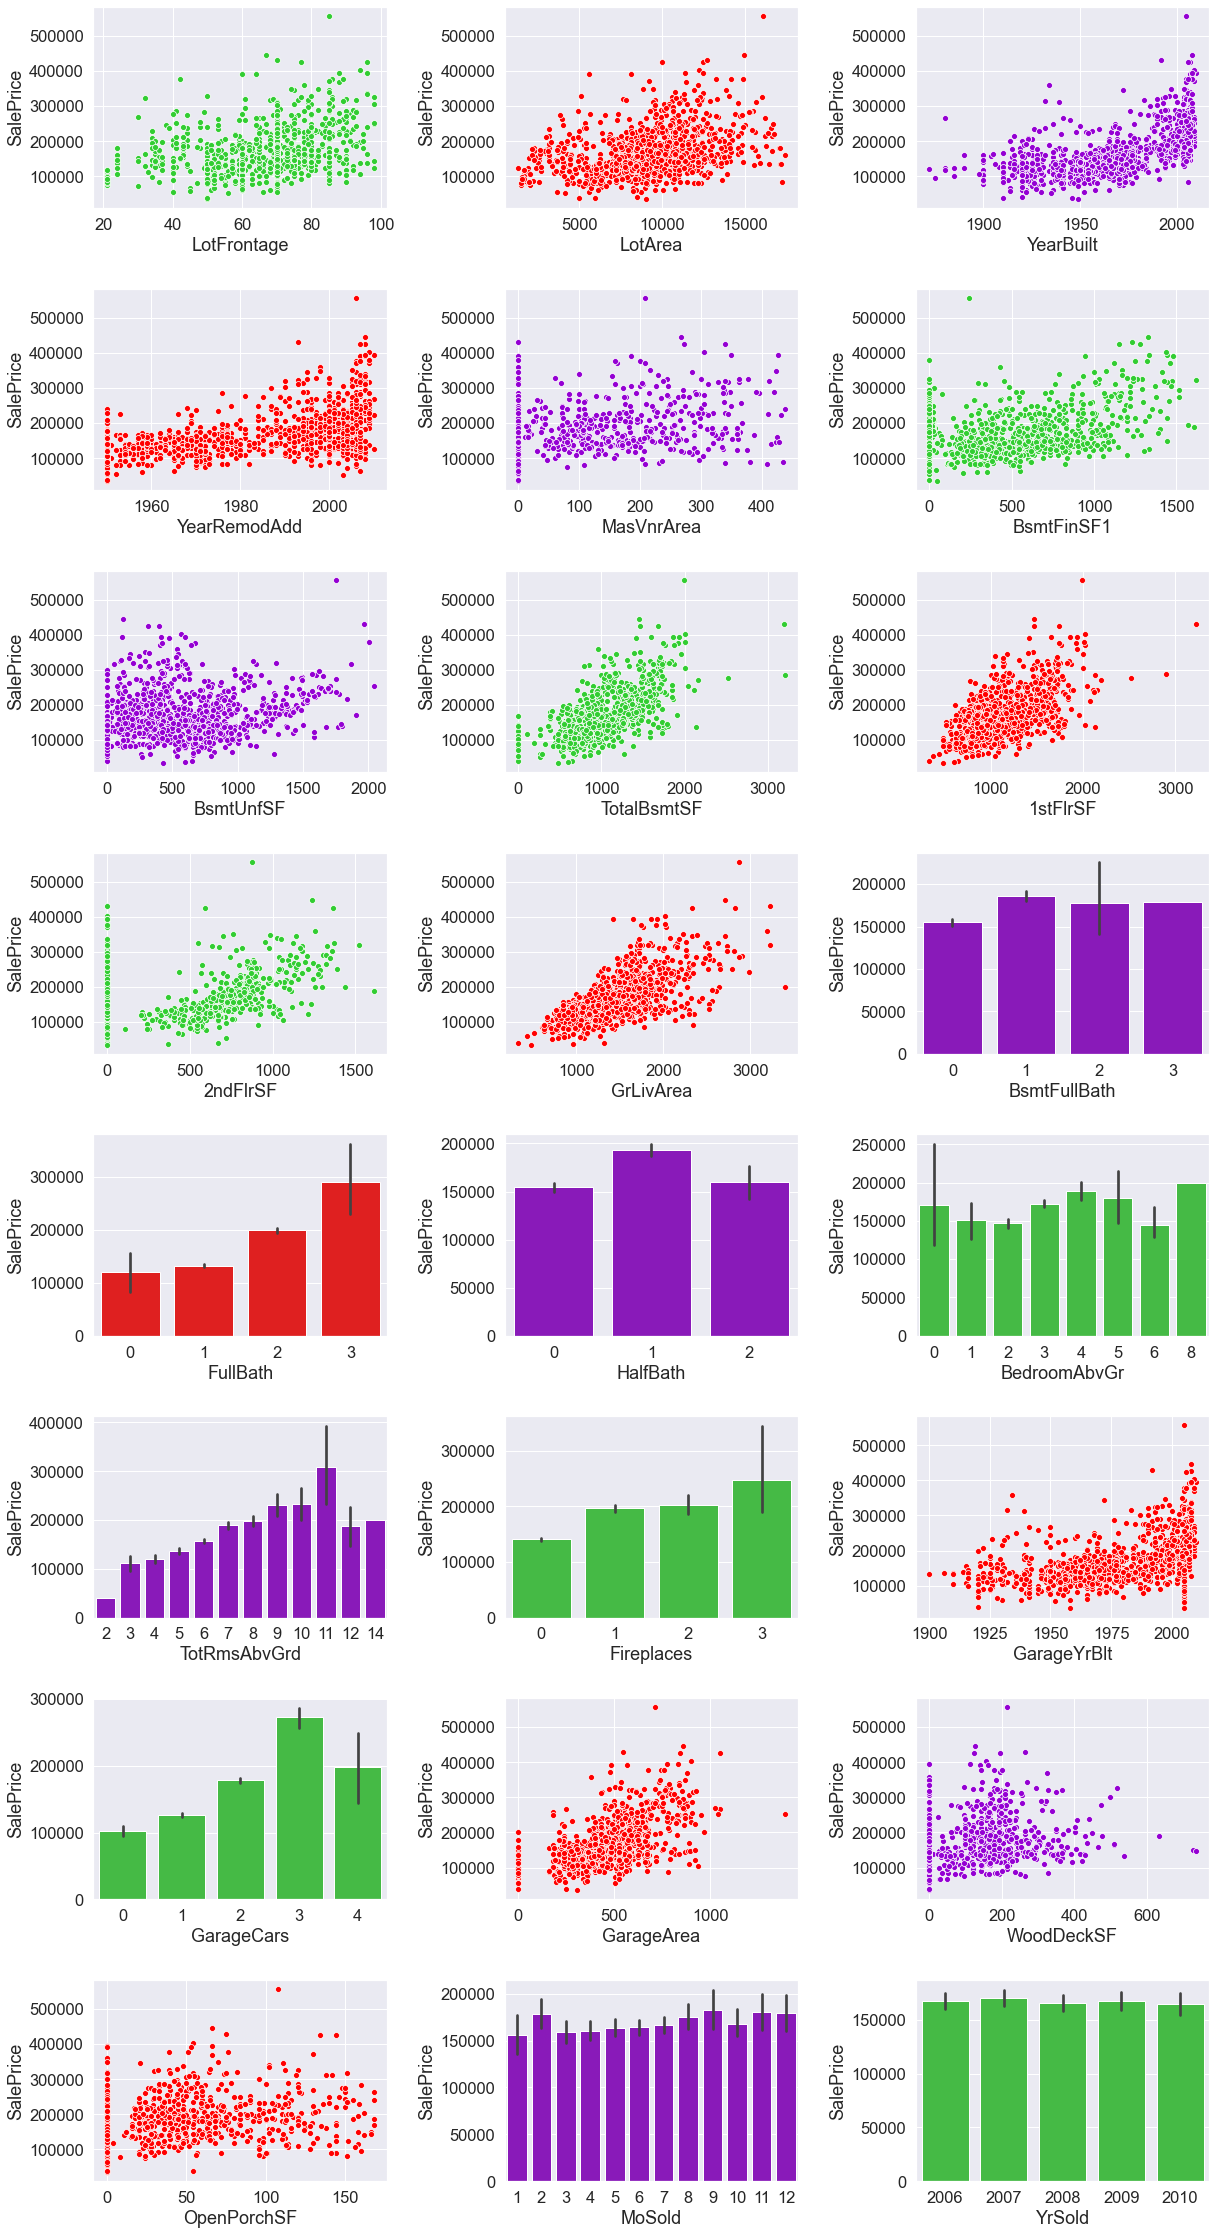

In [23]:
#plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(8, 3, figsize=(20,40))

sns.scatterplot(x=data['LotFrontage'], y=data['SalePrice'], data=data, ax=ax[0][0], color='limegreen')
ax[0][0].set(xlabel='LotFrontage', ylabel='SalePrice')
sns.scatterplot(data['LotArea'], y=data['SalePrice'], data=data, ax=ax[0][1], color='red')
ax[0][1].set(xlabel='LotArea', ylabel='SalePrice')
sns.scatterplot(data['YearBuilt'], y=data['SalePrice'], data=data, ax=ax[0][2], color='darkviolet')
ax[0][2].set(xlabel='YearBuilt', ylabel='SalePrice')

sns.scatterplot(data['YearRemodAdd'], y=data['SalePrice'], data=data, ax=ax[1][0], color='red')
ax[1][0].set(xlabel='YearRemodAdd', ylabel='SalePrice')
sns.scatterplot(data['MasVnrArea'], y=data['SalePrice'], data=data, ax=ax[1][1], color='darkviolet')
ax[1][1].set(xlabel='MasVnrArea', ylabel='SalePrice')
sns.scatterplot(data['BsmtFinSF1'], y=data['SalePrice'], data=data, ax=ax[1][2], color='limegreen')
ax[1][2].set(xlabel='BsmtFinSF1', ylabel='SalePrice')

sns.scatterplot(data['BsmtUnfSF'], y=data['SalePrice'], data=data, ax=ax[2][0], color='darkviolet')
ax[2][0].set(xlabel='BsmtUnfSF', ylabel='SalePrice')
sns.scatterplot(data['TotalBsmtSF'], y=data['SalePrice'], data=data, ax=ax[2][1], color='limegreen')
ax[2][1].set(xlabel='TotalBsmtSF', ylabel='SalePrice')
sns.scatterplot(data['1stFlrSF'], y=data['SalePrice'], data=data, ax=ax[2][2], color='red')
ax[2][2].set(xlabel='1stFlrSF', ylabel='SalePrice')

sns.scatterplot(data['2ndFlrSF'], y=data['SalePrice'], data=data, ax=ax[3][0], color='limegreen')
ax[3][0].set(xlabel='2ndFlrSF', ylabel='SalePrice')
sns.scatterplot(data['GrLivArea'], y=data['SalePrice'], data=data, ax=ax[3][1], color='red')
ax[3][1].set(xlabel='GrLivArea', ylabel='SalePrice')
sns.barplot(data['BsmtFullBath'], y=data['SalePrice'], data=data, ax=ax[3][2], color='darkviolet')
ax[3][2].set(xlabel='BsmtFullBath', ylabel='SalePrice')

sns.barplot(data['FullBath'], y=data['SalePrice'], data=data, ax=ax[4][0], color='red')
ax[4][0].set(xlabel='FullBath', ylabel='SalePrice')
sns.barplot(data['HalfBath'], y=data['SalePrice'], data=data, ax=ax[4][1], color='darkviolet')
ax[4][1].set(xlabel='HalfBath', ylabel='SalePrice')
sns.barplot(data['BedroomAbvGr'], y=data['SalePrice'], data=data, ax=ax[4][2], color='limegreen')
ax[4][2].set(xlabel='BedroomAbvGr', ylabel='SalePrice')

sns.barplot(data['TotRmsAbvGrd'], y=data['SalePrice'], data=data, ax=ax[5][0], color='darkviolet')
ax[5][0].set(xlabel='TotRmsAbvGrd', ylabel='SalePrice')
sns.barplot(data['Fireplaces'], y=data['SalePrice'], data=data, ax=ax[5][1], color='limegreen')
ax[5][1].set(xlabel='Fireplaces', ylabel='SalePrice')
sns.scatterplot(data['GarageYrBlt'], y=data['SalePrice'], data=data, ax=ax[5][2], color='red')
ax[5][2].set(xlabel='GarageYrBlt', ylabel='SalePrice')

sns.barplot(data['GarageCars'], y=data['SalePrice'], data=data, ax=ax[6][0], color='limegreen')
ax[6][0].set(xlabel='GarageCars', ylabel='SalePrice')
sns.scatterplot(data['GarageArea'], y=data['SalePrice'], data=data, ax=ax[6][1], color='red')
ax[6][1].set(xlabel='GarageArea', ylabel='SalePrice')
sns.scatterplot(data['WoodDeckSF'], y=data['SalePrice'], data=data, ax=ax[6][2], color='darkviolet')
ax[6][2].set(xlabel='WoodDeckSF', ylabel='SalePrice')

sns.scatterplot(data['OpenPorchSF'], y=data['SalePrice'], data=data, ax=ax[7][0], color='red')
ax[7][0].set(xlabel='OpenPorchSF', ylabel='SalePrice')
sns.barplot(data['MoSold'], y=data['SalePrice'], data=data, ax=ax[7][1], color='darkviolet')
ax[7][1].set(xlabel='MoSold', ylabel='SalePrice')
sns.barplot(data['YrSold'], y=data['SalePrice'], data=data, ax=ax[7][2], color='limegreen')
ax[7][2].set(xlabel='YrSold', ylabel='SalePrice')

plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Almost every numeric feature VS 'SalePrice' graph show some patterns that are non-linear in nature.
</div>

### Correlation Matrix

In [24]:
correlation = data[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
                    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
                    'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
                    'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']].corr()

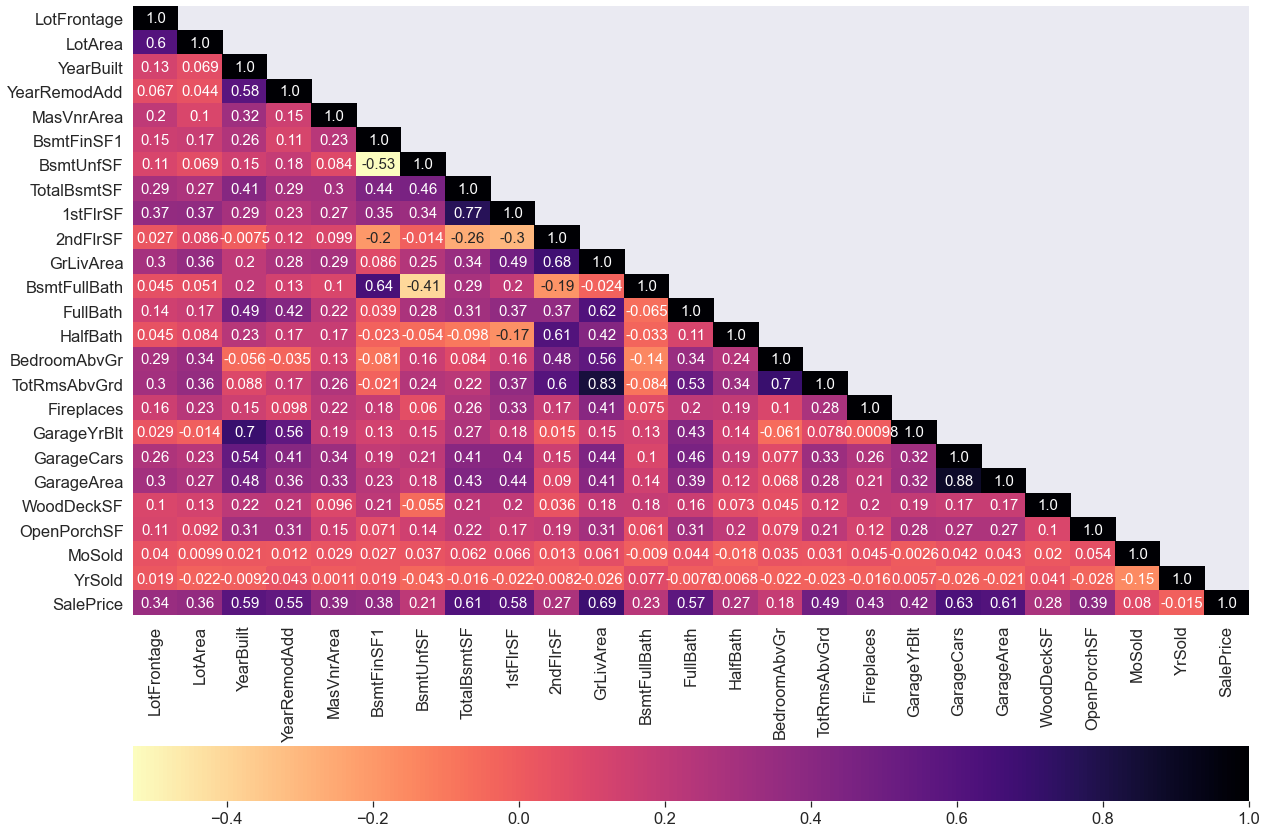

In [25]:
plt.rcParams['font.size'] = 20
plt.figure(figsize=[20,16])
sns.set(font_scale=1.5)
mask = np.zeros(correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask), k=1)] = True
sns.heatmap(correlation, annot=True, cmap='magma_r', annot_kws={"size": 15}, fmt=".2",  mask = mask, 
            cbar_kws = dict(use_gridspec=False,location="bottom"),
            xticklabels=list(correlation.columns.values), yticklabels=list(correlation.columns.values))
#plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Darker (black/blue) boxes are highly correlated here. You can see correlation between last row 'SalePrice' with 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars' and 'GarageArea' are significantly correlated as their values are above 0.50.<br>

Among these independent variables 2 pairs which are 'YearBuilt' & 'YearRemodAdd', 'TotalBsmtSF' & '1stFlrSF' are highly correlated with each other.
</div>

## 5.2 Numeric to Categorical Data

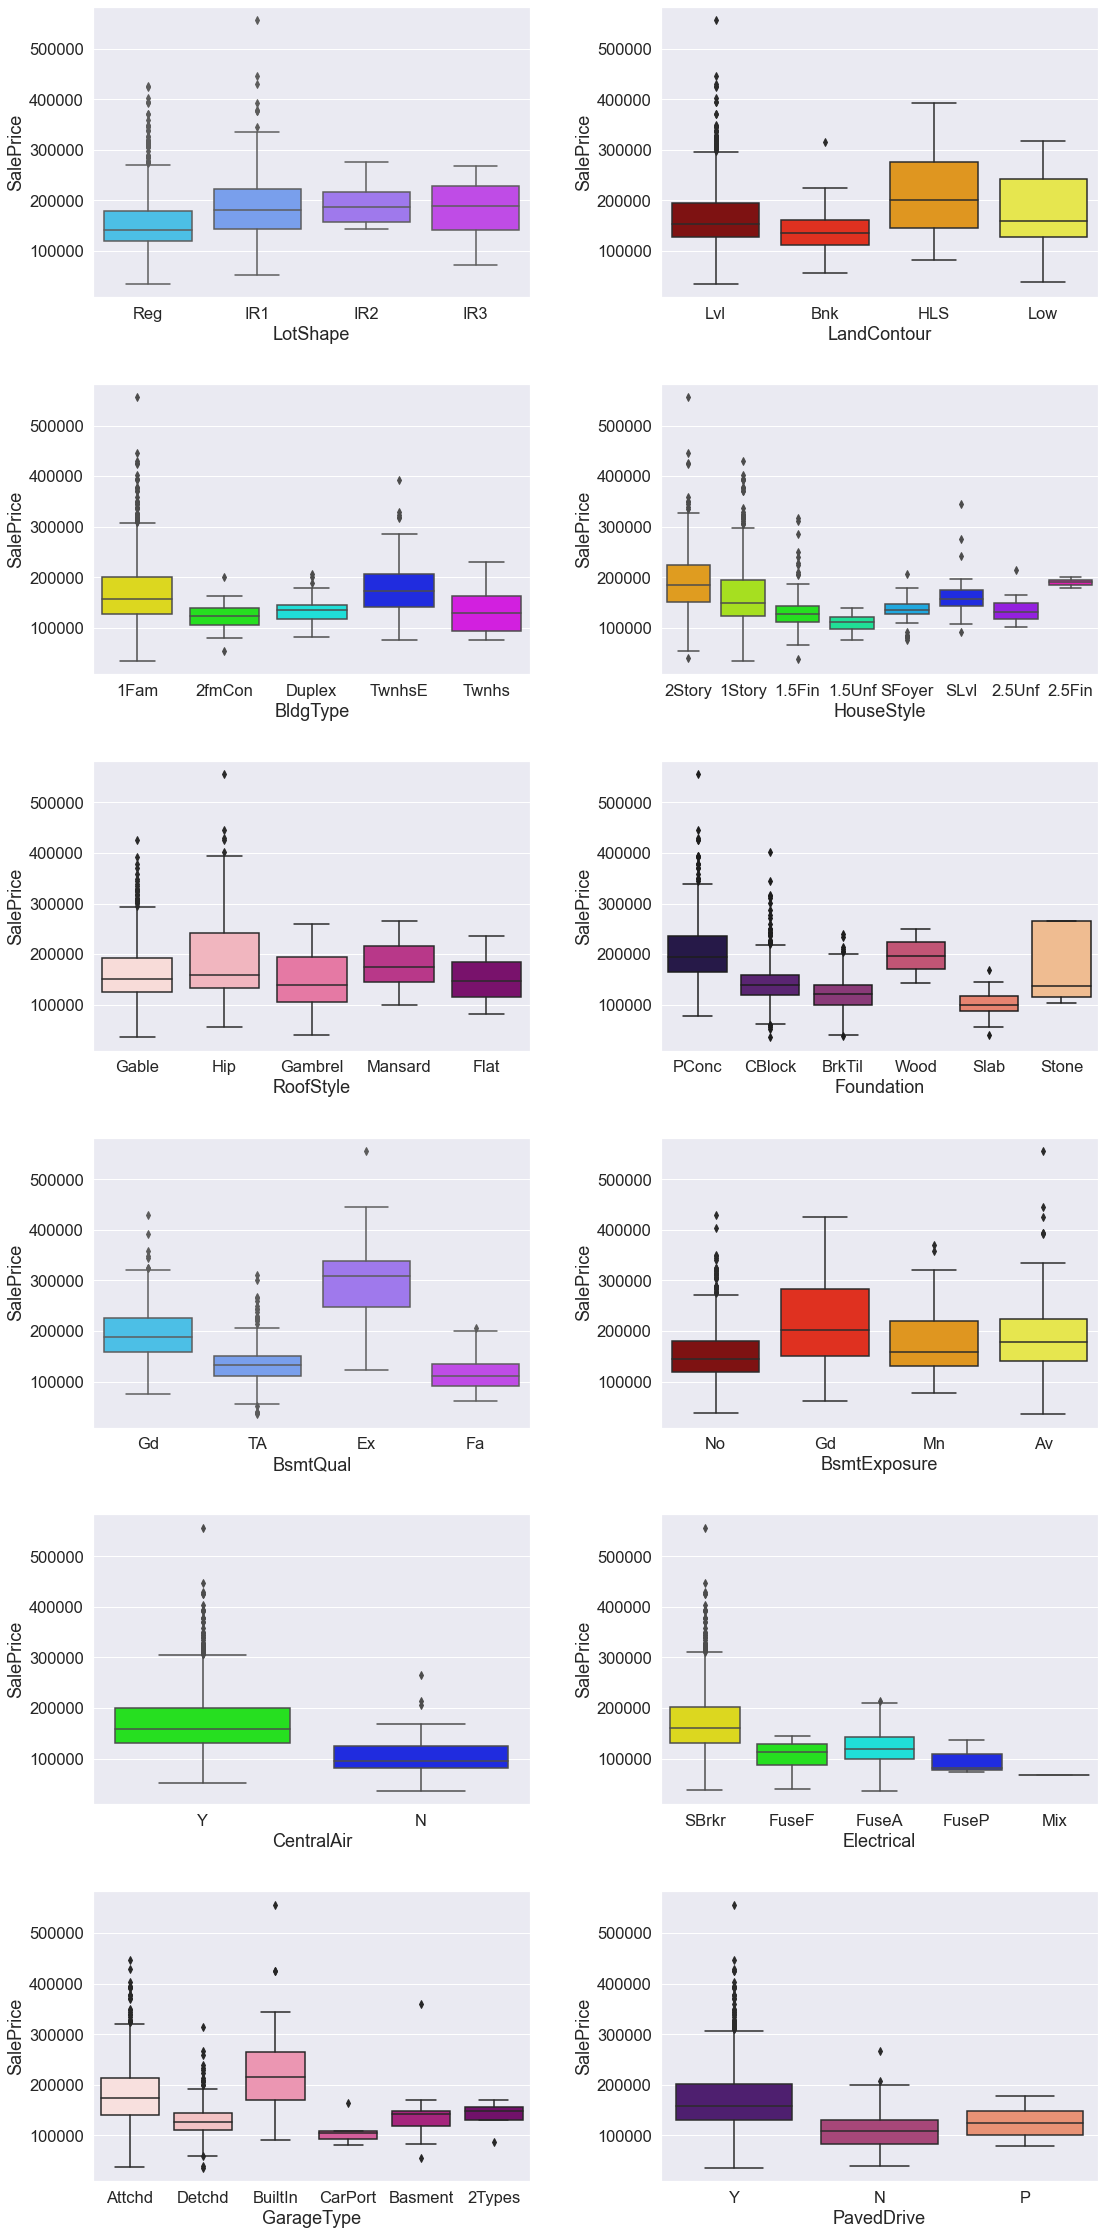

In [26]:
#plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(6, 2, figsize=(18,40))

sns.boxplot(x=data['LotShape'], y=data['SalePrice'], data=data, ax=ax[0][0], palette='cool')
ax[0][0].set(xlabel='LotShape', ylabel='SalePrice')
sns.boxplot(data['LandContour'], y=data['SalePrice'], data=data, ax=ax[0][1], palette='hot')
ax[0][1].set(xlabel='LandContour', ylabel='SalePrice')

sns.boxplot(data['BldgType'], y=data['SalePrice'], data=data, ax=ax[1][0], palette='hsv')
ax[1][0].set(xlabel='BldgType', ylabel='SalePrice')
sns.boxplot(data['HouseStyle'], y=data['SalePrice'], data=data, ax=ax[1][1], palette='hsv')
ax[1][1].set(xlabel='HouseStyle', ylabel='SalePrice')

sns.boxplot(data['RoofStyle'], y=data['SalePrice'], data=data, ax=ax[2][0], palette='RdPu')
ax[2][0].set(xlabel='RoofStyle', ylabel='SalePrice')
sns.boxplot(data['Foundation'], y=data['SalePrice'], data=data, ax=ax[2][1], palette='magma')
ax[2][1].set(xlabel='Foundation', ylabel='SalePrice')

sns.boxplot(data['BsmtQual'], y=data['SalePrice'], data=data, ax=ax[3][0], palette='cool')
ax[3][0].set(xlabel='BsmtQual', ylabel='SalePrice')
sns.boxplot(data['BsmtExposure'], y=data['SalePrice'], data=data, ax=ax[3][1], palette='hot')
ax[3][1].set(xlabel='BsmtExposure', ylabel='SalePrice')

sns.boxplot(data['CentralAir'], y=data['SalePrice'], data=data, ax=ax[4][0], palette='hsv')
ax[4][0].set(xlabel='CentralAir', ylabel='SalePrice')
sns.boxplot(data['Electrical'], y=data['SalePrice'], data=data, ax=ax[4][1], palette='hsv')
ax[4][1].set(xlabel='Electrical', ylabel='SalePrice')

sns.boxplot(data['GarageType'], y=data['SalePrice'], data=data, ax=ax[5][0], palette='RdPu')
ax[5][0].set(xlabel='GarageType', ylabel='SalePrice')
sns.boxplot(data['PavedDrive'], y=data['SalePrice'], data=data, ax=ax[5][1], palette='magma')
ax[5][1].set(xlabel='PavedDrive', ylabel='SalePrice')

plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> All categories in each feature column VS 'SalePrice' share an almost significant part in each.
</div>

# 6. Data Preparation for Learning Model

## `Reducing Categories`

In [27]:
# Reducing no. of categories in each column having 3 or more categories 
# for the ease of dummy variable creation depending on each category share part.

data['MSSubClass'].loc[(data['MSSubClass'] != '20')] = 'Other'
data['MSZoning'].loc[(data['MSZoning'] != 'RL')] = 'Other'
data['LotShape'].loc[(data['LotShape'] != 'Reg') & (data['LotShape'] != 'IR1')] = 'Other'
data['LandContour'].loc[(data['LandContour'] != 'Lvl')] = 'Other'
data['LotConfig'].loc[(data['LotConfig'] != 'Inside')] = 'Other'
data['Condition1'].loc[(data['Condition1'] != 'Norm')] = 'Other'
data['BldgType'].loc[(data['BldgType'] != '1Fam')] = 'Other'
data['HouseStyle'].loc[(data['HouseStyle'] != '1Story') & (data['HouseStyle'] != '2Story')] = 'Other'
data['OverallQual'].loc[(data['OverallQual'] != '5') &
                        (data['OverallQual'] != '6') &
                        (data['OverallQual'] != '7')] = 'Other'
data['OverallCond'].loc[(data['OverallCond'] != '5')] = 'Other'
data['RoofStyle'].loc[(data['RoofStyle'] != 'Gable')] = 'Other'
data['Exterior1st'].loc[(data['Exterior1st'] != 'VinylSd')] = 'Other'
data['MasVnrType'].loc[(data['MasVnrType'] != 'None') & (data['MasVnrType'] != 'BrkFace')] = 'Other'
data['ExterQual'].loc[(data['ExterQual'] != 'TA') & (data['ExterQual'] != 'Gd')] = 'Other'
data['Foundation'].loc[(data['Foundation'] != 'CBlock') & (data['Foundation'] != 'PConc')] = 'Other'
data['BsmtQual'].loc[(data['BsmtQual'] != 'TA') & (data['BsmtQual'] != 'Gd')] = 'Other'
data['BsmtExposure'].loc[(data['BsmtExposure'] != 'No')] = 'Other'
data['BsmtFinType1'].loc[(data['BsmtFinType1'] != 'GLQ') & (data['BsmtFinType1'] != 'Unf')] = 'Other'
data['HeatingQC'].loc[(data['HeatingQC'] != 'Ex') & (data['HeatingQC'] != 'TA')] = 'Other'
data['Electrical'].loc[(data['Electrical'] != 'SBrkr')] = 'Other'
data['KitchenQual'].loc[(data['KitchenQual'] != 'Gd') & (data['KitchenQual'] != 'TA')] = 'Other'
data['Functional'].loc[(data['Functional'] != 'Typ')] = 'Other'
data['GarageType'].loc[(data['GarageType'] != 'Attchd') & (data['GarageType'] != 'Detchd')] = 'Other'
data['GarageFinish'].loc[(data['GarageFinish'] != 'Unf')] = 'Other'
data['PavedDrive'].loc[(data['PavedDrive'] != 'Y')] = 'Other'
data['SaleType'].loc[(data['SaleType'] != 'WD')] = 'Other'
data['SaleCondition'].loc[(data['SaleCondition'] != 'Normal')] = 'Other'
data.drop(['Neighborhood'], axis = 1, inplace=True)

##  `After Category Reduction`

In [28]:
data.describe(include = ['O'])

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
count,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188
unique,2,2,3,2,2,2,2,3,4,2,2,2,3,3,3,3,2,3,3,2,2,3,2,3,2,2,2,2
top,Other,RL,Reg,Lvl,Inside,Norm,1Fam,1Story,5,5,Gable,Other,None,TA,CBlock,TA,No,Other,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,Y,WD,Normal
freq,756,924,800,1084,895,1029,979,603,352,649,962,780,753,776,525,589,843,479,573,1106,1072,629,1105,757,605,1087,1042,984


<div class="alert alert-block alert-info">
<b>Note:</b> Notice the (2nd row) unique categories have been reduced to 2-4 categories from 6-15 categories approx.
</div>

In [29]:
data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,Other,RL,62,7917,Reg,Lvl,Inside,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,None,0,TA,PConc,Gd,No,Unf,0,953,953,Ex,Y,SBrkr,953,694,1647,0,2,1,3,TA,7,Typ,1,Attchd,1999,Other,2,460,Y,0,40,8,2007,WD,Normal,175000
1456,20,RL,85,13175,Reg,Lvl,Inside,Norm,1Fam,1Story,6,Other,1978,1988,Gable,Other,Other,119,TA,CBlock,Gd,No,Other,790,589,1542,TA,Y,SBrkr,2073,0,2073,1,2,0,3,TA,7,Other,2,Attchd,1978,Unf,2,500,Y,349,0,2,2010,WD,Normal,210000
1457,Other,RL,66,9042,Reg,Lvl,Inside,Norm,1Fam,2Story,7,Other,1941,2006,Gable,Other,None,0,Other,Other,TA,No,GLQ,275,877,1152,Ex,Y,SBrkr,1188,1152,2340,0,2,0,4,Gd,9,Typ,2,Attchd,1941,Other,1,252,Y,0,60,5,2010,WD,Normal,266500
1458,20,RL,68,9717,Reg,Lvl,Inside,Norm,1Fam,1Story,5,Other,1950,1996,Other,Other,None,0,TA,CBlock,TA,Other,GLQ,49,0,1078,Other,Y,Other,1078,0,1078,1,1,0,2,Gd,5,Typ,0,Attchd,1950,Unf,1,240,Y,366,0,4,2010,WD,Normal,142125
1459,20,RL,75,9937,Reg,Lvl,Inside,Norm,1Fam,1Story,5,Other,1965,1965,Gable,Other,None,0,Gd,CBlock,TA,No,Other,830,136,1256,Other,Y,SBrkr,1256,0,1256,1,1,1,3,TA,6,Typ,0,Attchd,1965,Other,1,276,Y,736,68,6,2008,WD,Normal,147500


In [30]:
X = data.loc[:,'MSSubClass':'SaleCondition']
Y = data['SalePrice']

In [31]:
print('Data (rows, cols) =',data.shape)
print('X (rows, cols) =',X.shape)
print('Y (rows, cols) =',Y.shape)

Data (rows, cols) = (1188, 53)
X (rows, cols) = (1188, 52)
Y (rows, cols) = (1188,)


In [32]:
categorical = X.select_dtypes(include=['object'])
print(categorical.shape)
categorical.head()

(1188, 28)


,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,Other,RL,Reg,Lvl,Inside,Norm,1Fam,2Story,7,5,Gable,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Y,SBrkr,Gd,Typ,Attchd,Other,Y,WD,Normal
1,20,RL,Reg,Lvl,Other,Other,1Fam,1Story,6,Other,Gable,Other,None,TA,CBlock,Gd,Other,Other,Ex,Y,SBrkr,TA,Typ,Attchd,Other,Y,WD,Normal
2,Other,RL,IR1,Lvl,Inside,Norm,1Fam,2Story,7,5,Gable,VinylSd,BrkFace,Gd,PConc,Gd,Other,GLQ,Ex,Y,SBrkr,Gd,Typ,Attchd,Other,Y,WD,Normal
3,Other,RL,IR1,Lvl,Other,Norm,1Fam,2Story,7,5,Gable,Other,None,TA,Other,TA,No,Other,Other,Y,SBrkr,Gd,Typ,Detchd,Unf,Y,WD,Other
4,Other,RL,IR1,Lvl,Other,Norm,1Fam,2Story,Other,5,Gable,VinylSd,BrkFace,Gd,PConc,Gd,Other,GLQ,Ex,Y,SBrkr,Gd,Typ,Attchd,Other,Y,WD,Normal


## `Creating dummies`

In [33]:
# convert into dummies

columns = list(categorical.columns)
dummies = pd.get_dummies(data = categorical, columns = columns, drop_first=True)
print(dummies.shape)
dummies.head()

(1188, 40)


,MSSubClass_Other,MSZoning_RL,LotShape_Other,LotShape_Reg,LandContour_Other,LotConfig_Other,Condition1_Other,BldgType_Other,HouseStyle_2Story,HouseStyle_Other,OverallQual_6,OverallQual_7,OverallQual_Other,OverallCond_Other,RoofStyle_Other,Exterior1st_VinylSd,MasVnrType_None,MasVnrType_Other,ExterQual_Other,ExterQual_TA,Foundation_Other,Foundation_PConc,BsmtQual_Other,BsmtQual_TA,BsmtExposure_Other,BsmtFinType1_Other,BsmtFinType1_Unf,HeatingQC_Other,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Other,KitchenQual_TA,Functional_Typ,GarageType_Detchd,GarageType_Other,GarageFinish_Unf,PavedDrive_Y,SaleType_WD,SaleCondition_Other
0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0
1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,0
2,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0
3,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,1,1,1
4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0


In [34]:
# drop original categorical variables 
X = X.drop(list(categorical.columns), axis=1)
X.shape

(1188, 24)

In [35]:
# concat dummy variables with X
X = pd.concat([X, dummies], axis=1)
print(X.shape)
X.head()

(1188, 64)


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSSubClass_Other,MSZoning_RL,LotShape_Other,LotShape_Reg,LandContour_Other,LotConfig_Other,Condition1_Other,BldgType_Other,HouseStyle_2Story,HouseStyle_Other,OverallQual_6,OverallQual_7,OverallQual_Other,OverallCond_Other,RoofStyle_Other,Exterior1st_VinylSd,MasVnrType_None,MasVnrType_Other,ExterQual_Other,ExterQual_TA,Foundation_Other,Foundation_PConc,BsmtQual_Other,BsmtQual_TA,BsmtExposure_Other,BsmtFinType1_Other,BsmtFinType1_Unf,HeatingQC_Other,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Other,KitchenQual_TA,Functional_Typ,GarageType_Detchd,GarageType_Other,GarageFinish_Unf,PavedDrive_Y,SaleType_WD,SaleCondition_Other
0,65,8450,2003,2003,196,706,150,856,856,854,1710,1,2,1,3,8,0,2003,2,548,0,61,2,2008,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0
1,80,9600,1976,1976,0,978,284,1262,1262,0,1262,0,2,0,3,6,1,1976,2,460,298,0,5,2007,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,0
2,68,11250,2001,2002,162,486,434,920,920,866,1786,1,2,1,3,6,1,2001,2,608,0,42,9,2008,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0
3,60,9550,1915,1970,0,216,540,756,961,756,1717,1,1,0,3,7,1,1998,3,642,0,35,2,2006,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,1,1,1
4,84,14260,2000,2000,350,655,490,1145,1145,1053,2198,1,2,1,4,9,1,2000,3,836,192,84,12,2008,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0


In [36]:
# scaling the features
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'MSSubClass_Other',
       'MSZoning_RL', 'LotShape_Other', 'LotShape_Reg', 'LandContour_Other',
       'LotConfig_Other', 'Condition1_Other', 'BldgType_Other',
       'HouseStyle_2Story', 'HouseStyle_Other', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_Other', 'OverallCond_Other',
       'RoofStyle_Other', 'Exterior1st_VinylSd', 'MasVnrType_None',
       'MasVnrType_Other', 'ExterQual_Other', 'ExterQual_TA',
       'Foundation_Other', 'Foundation_PConc', 'BsmtQual_Other', 'BsmtQual_TA',
       'BsmtExposure_Other', 'BsmtFinType1_Other', 'BsmtFinType1_Unf',
       'HeatingQC_Other', 'HeatingQC_TA', 'CentralAir_Y', 'Electri

## `Correlation matrix for all 65 variables`
#### (64 features and 1 target variable after creating dummies)

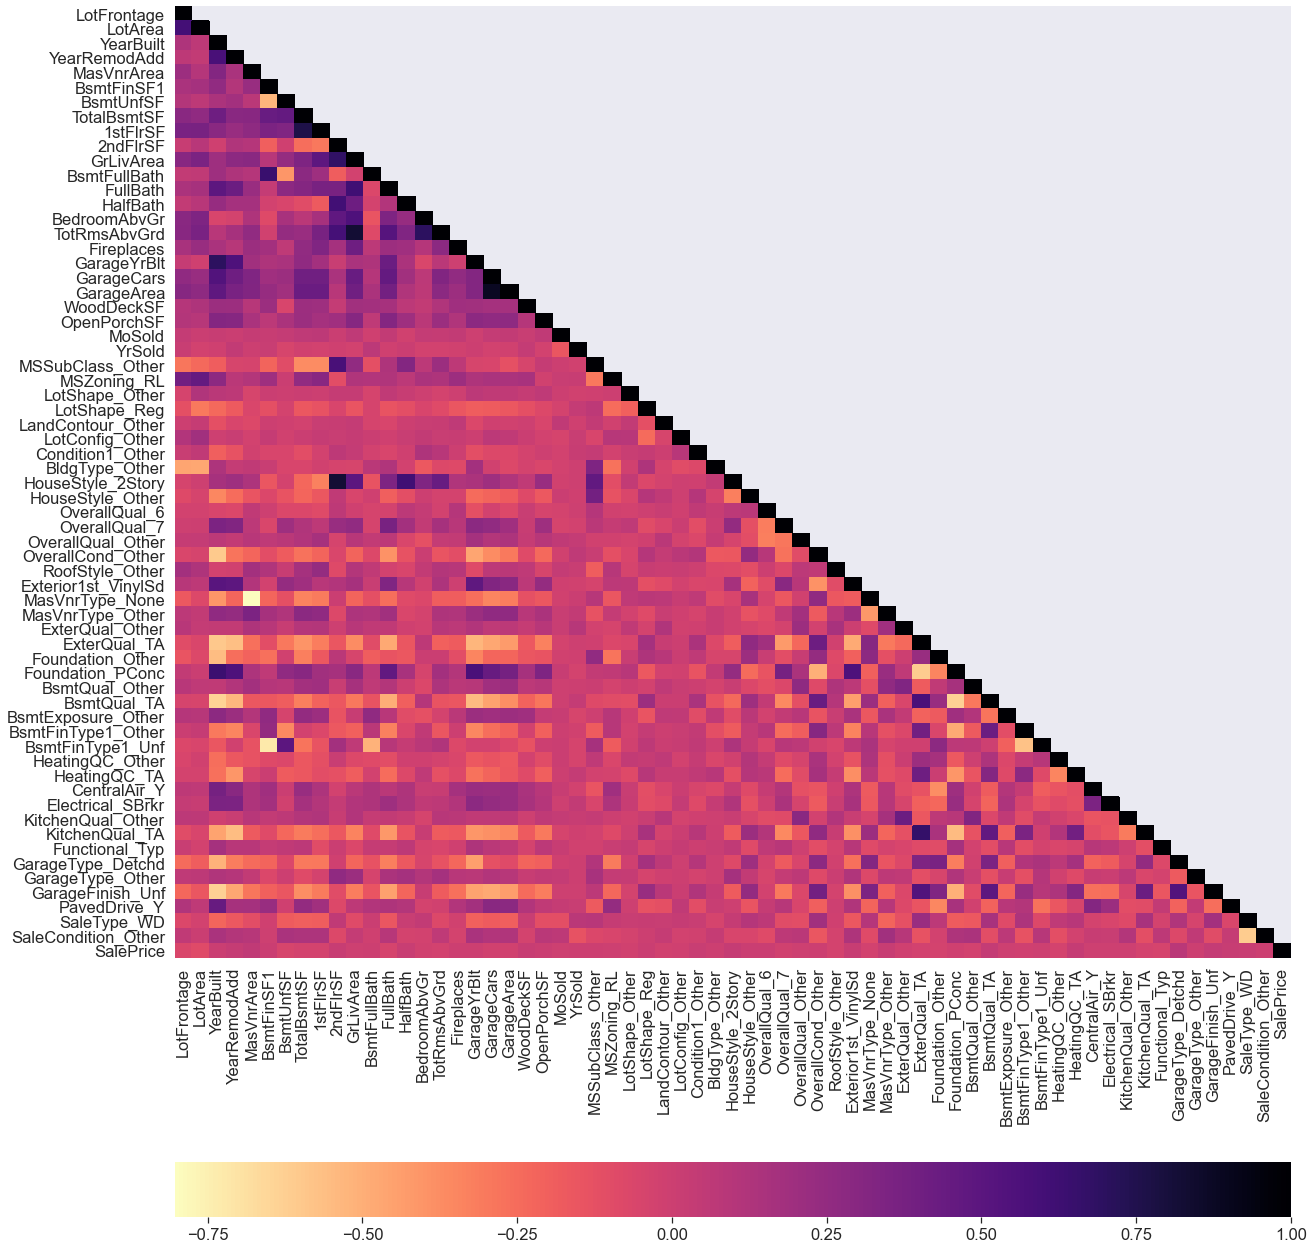

In [37]:
fulldata = pd.concat([X, Y], axis=1)
correlation = fulldata[fulldata.columns].corr()
plt.rcParams['font.size'] = 20
plt.figure(figsize=[20,25])
sns.set(font_scale=1.5)
mask = np.zeros(correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask), k=1)] = True
sns.heatmap(correlation, annot=False, cmap='magma_r', annot_kws={"size": 15}, fmt=".2",  mask = mask, 
            cbar_kws = dict(use_gridspec=False,location="bottom"),
            xticklabels=list(correlation.columns.values), yticklabels=list(correlation.columns.values))
#plt.xticks(rotation = 45)
plt.show()

## `Highly Correlated pairs`

In [38]:
# Extracting highly correlated pairs to get rid of one of them from each pair. 

absolute_corr = fulldata.corr().abs()

highest_correlation = absolute_corr.unstack()
pair = highest_correlation.sort_values(kind="quicksort")

print(pair[-75:-65])

1stFlrSF           TotalBsmtSF          0.765707
TotalBsmtSF        1stFlrSF             0.765707
MasVnrType_None    MasVnrArea           0.803466
MasVnrArea         MasVnrType_None      0.803466
2ndFlrSF           HouseStyle_2Story    0.825875
HouseStyle_2Story  2ndFlrSF             0.825875
TotRmsAbvGrd       GrLivArea            0.828487
GrLivArea          TotRmsAbvGrd         0.828487
GarageArea         GarageCars           0.884063
GarageCars         GarageArea           0.884063
dtype: float64


In [39]:
# dropping 5 columns out of above 10 displayed
X.drop(['1stFlrSF', 'MasVnrType_None', 'HouseStyle_2Story', 'TotRmsAbvGrd',  'GarageCars'], axis = 1, inplace=True)

## `Correlation matrix for leftover 60 variables`
#### (59 features and 1 target variable after creating dummies)

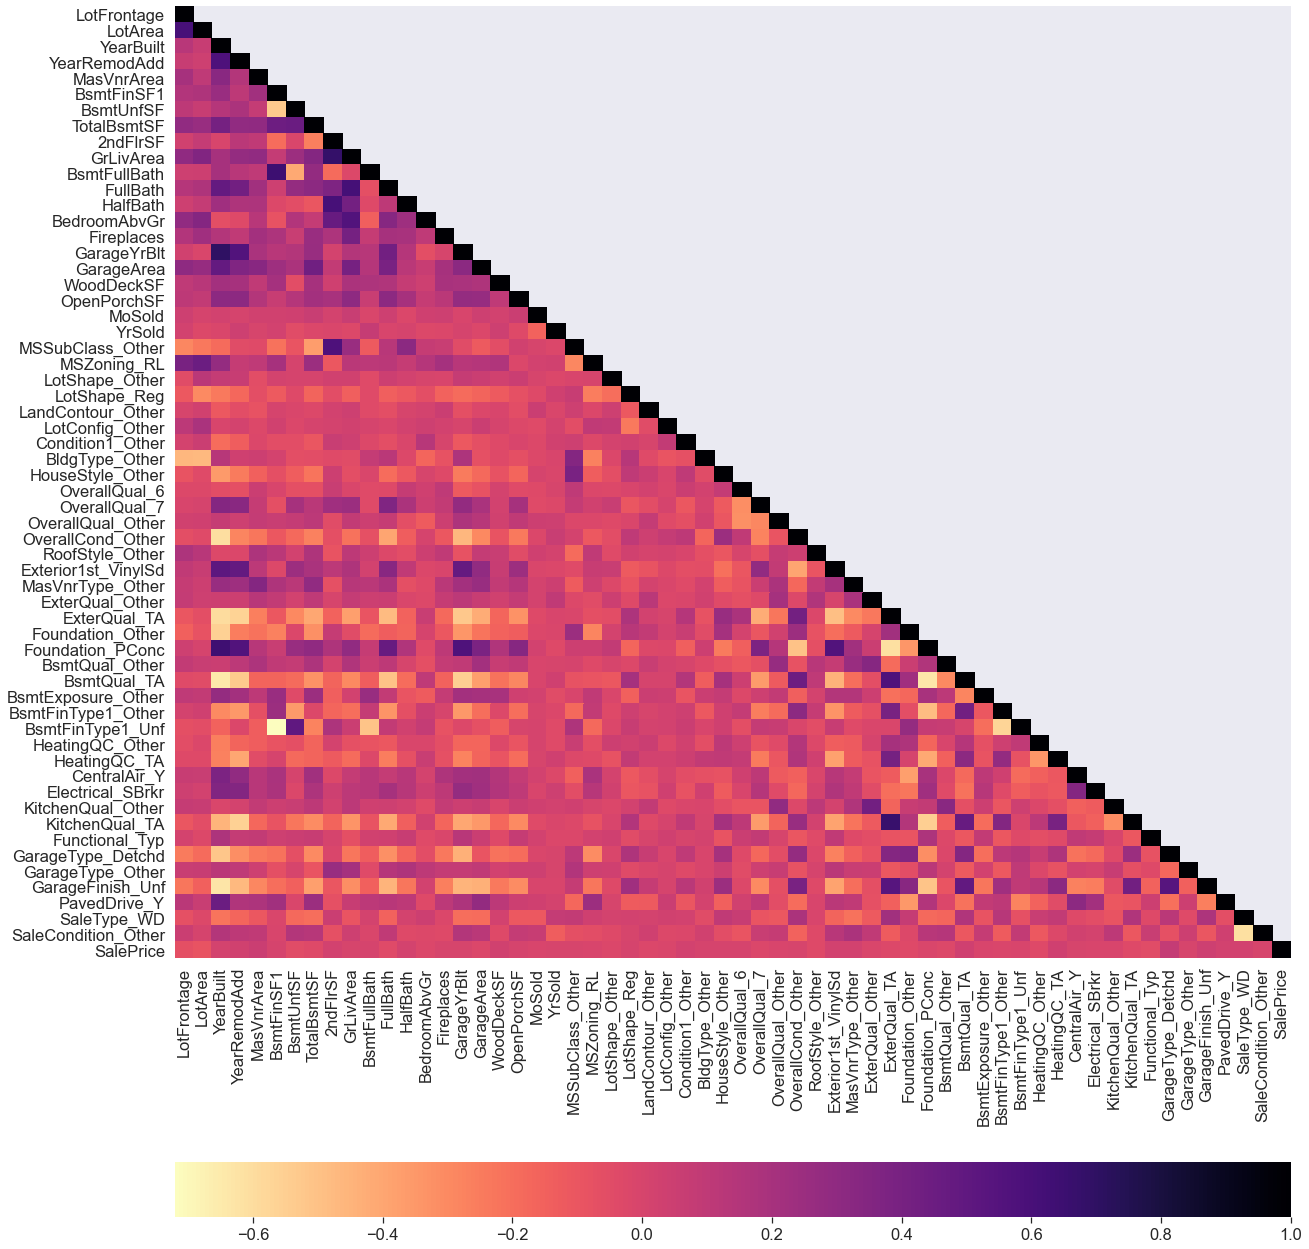

In [40]:
# correlation recheck

fulldata = pd.concat([X, Y], axis=1)
correlation = fulldata[fulldata.columns].corr()
plt.rcParams['font.size'] = 20
plt.figure(figsize=[20,25])
sns.set(font_scale=1.5)
mask = np.zeros(correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask), k=1)] = True
sns.heatmap(correlation, annot=False, cmap='magma_r', annot_kws={"size": 15}, fmt=".2",  mask = mask, 
            cbar_kws = dict(use_gridspec=False,location="bottom"),
            xticklabels=list(correlation.columns.values), yticklabels=list(correlation.columns.values))
#plt.xticks(rotation = 45)
plt.show()

## `Correlation Pair Recheck`

In [41]:
# Extracting highly correlated pairs to get rid of one of them 

absolute_corr = fulldata.corr().abs()

highest_correlation = absolute_corr.unstack()
pair = highest_correlation.sort_values(kind="quicksort")

print(pair[-70:-60])

BsmtFullBath      BsmtFinSF1          0.644957
BsmtFinSF1        BsmtFullBath        0.644957
KitchenQual_TA    ExterQual_TA        0.666626
ExterQual_TA      KitchenQual_TA      0.666626
2ndFlrSF          GrLivArea           0.682542
GrLivArea         2ndFlrSF            0.682542
GarageYrBlt       YearBuilt           0.699649
YearBuilt         GarageYrBlt         0.699649
BsmtFinType1_Unf  BsmtFinSF1          0.720573
BsmtFinSF1        BsmtFinType1_Unf    0.720573
dtype: float64


<div class="alert alert-block alert-info">
<b>Note:</b> We no longer have highly correlated columns. All are below 0.75. Eliminating multicolinearinty is better for better model development.
</div>

In [42]:
X.shape

(1188, 59)

In [43]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size = 0.3, random_state=100)

# 7. Model Building and Evaluation

In [44]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import os

## `Ridge`

In [45]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [46]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014349,0.028699,0.012502,0.006251,0.0001,{'alpha': 0.0001},-13937.049553,-15825.565535,-16786.886220,-17748.142563,-17386.770289,-16336.882832,1365.068928,26,-15312.162434,-14588.489987,-14503.066340,-14180.345508,-14273.697511,-14571.552356,398.808428
1,0.009604,0.002238,0.003338,0.003368,0.001,{'alpha': 0.001},-13937.021936,-15825.563612,-16786.866872,-17748.135802,-17386.760839,-16336.869812,1365.074656,25,-15312.160375,-14588.487763,-14503.060719,-14180.347127,-14273.696606,-14571.550518,398.807655
2,0.011605,0.003665,0.001601,0.003201,0.01,{'alpha': 0.01},-13936.745818,-15825.544370,-16786.673413,-17748.068196,-17386.666336,-16336.739626,1365.131914,24,-15312.139780,-14588.465526,-14503.004522,-14180.363306,-14273.687548,-14571.532136,398.799927
3,0.008889,0.001017,0.002423,0.002952,0.05,{'alpha': 0.05},-13935.519642,-15825.458639,-16785.814063,-17747.767757,-17386.246244,-16336.161269,1365.386126,23,-15312.048242,-14588.366652,-14502.754990,-14180.435051,-14273.647174,-14571.450422,398.765632
4,0.007664,0.002953,0.004035,0.003360,0.1,{'alpha': 0.1},-13933.989247,-15825.350993,-16784.740948,-17747.392289,-17385.720953,-16335.438886,1365.703277,22,-15311.933807,-14588.242965,-14502.444623,-14180.524361,-14273.596436,-14571.348439,398.722852


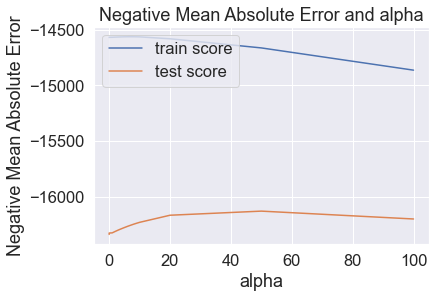

In [47]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Alpha = 50
</div>

In [48]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
ridge.coef_

array([ 1403.3073734 ,  5134.30211495,  8407.77088693,  6564.82097033,
        -620.98081492,  6234.71143917,   920.88569786,  9525.56382179,
        5042.35394399, 16936.15365129,   388.83040604,  3574.85016175,
        1296.15200829, -1802.06496508,  4943.24425508, -1193.88166401,
        5375.11448517,  1006.00229051,  1803.8623209 ,   544.26275441,
        -456.8062044 ,  -388.05219282,   618.51993005,   102.42225148,
        -300.03671647,   864.09720831,  -199.07314273, -2285.42777339,
       -3268.30813373,   319.94666263,  -509.80087223,   428.79079539,
        3216.88389407,  2367.65907149,  2107.86594317, -2841.5459068 ,
        3320.51429984,   657.51427778, -4566.34237627,  1263.18400248,
        1494.22756012,  6001.35167623,   860.94032359,  1646.84343268,
       -4454.88644489, -3598.4325052 , -1776.84464154, -2818.76000447,
        1847.43329917,   531.12674879,  3744.55276687,  -246.76382052,
        5084.39621962,  -214.58952314,  -631.93033267, -1588.72749617,
      

## `Lasso`

In [49]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.044805,0.017965,0.008520,0.001035,0.0001,{'alpha': 0.0001},-13937.052260,-15825.565381,-16786.888098,-17748.143099,-17386.771155,-16336.883999,1365.068356,28,-15312.162553,-14588.490176,-14503.066875,-14180.345264,-14273.697545,-14571.552483,398.808498
1,0.043510,0.010255,0.009259,0.004485,0.001,{'alpha': 0.001},-13937.049010,-15825.562070,-16786.885652,-17748.141169,-17386.769499,-16336.881480,1365.068931,27,-15312.161566,-14588.489654,-14503.066070,-14180.344687,-14273.696948,-14571.551785,398.808357
2,0.021814,0.003239,0.008497,0.003231,0.01,{'alpha': 0.01},-13937.016505,-15825.528964,-16786.861187,-17748.123386,-17386.752929,-16336.856594,1365.075002,26,-15312.151687,-14588.484438,-14503.058025,-14180.339306,-14273.690969,-14571.544885,398.806869
3,0.021822,0.003236,0.006885,0.003957,0.05,{'alpha': 0.05},-13936.872016,-15825.381825,-16786.752441,-17748.032325,-17386.679295,-16336.743580,1365.099503,25,-15312.107775,-14588.461250,-14503.022254,-14180.312782,-14273.664400,-14571.513692,398.800764
4,0.018573,0.003255,0.007662,0.003916,0.1,{'alpha': 0.1},-13936.691537,-15825.197925,-16786.616509,-17747.916411,-17386.587158,-16336.601908,1365.129636,24,-15312.052931,-14588.432279,-14502.977554,-14180.277805,-14273.631158,-14571.474346,398.793511


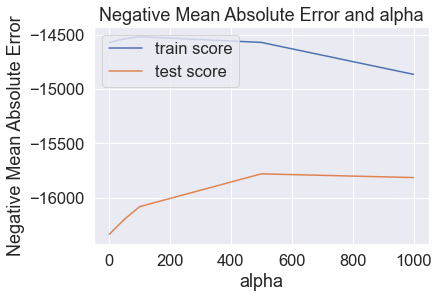

In [51]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Alpha = 485
</div>

In [81]:
alpha = 485

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, Y_train)

Lasso(alpha=485)

In [82]:
#np.set_printoptions(formatter={'float_kind':'{:.2f}'.format})
lasso.coef_

array([497.73, 4782.09, 10035.76, 6748.51, -0.00, 6050.48, -0.00, 8683.20,
       1281.15, 23364.03, 0.00, 1170.74, 0.00, -1701.53, 4673.96, -0.00,
       5065.36, 361.91, 1248.29, 132.73, -0.00, 0.00, 0.00, 0.00, -0.00,
       527.81, -0.00, -2271.27, -4087.66, 0.00, -126.59, 79.36, 2745.72,
       2016.73, 1260.45, -2122.11, 2883.22, 340.62, -4532.83, 107.39,
       732.74, 5946.55, -0.00, 1084.26, -3533.73, -2721.31, -819.85,
       -2324.01, 1149.40, 192.16, 3780.94, -0.00, 5575.02, 0.00, -27.87,
       -1241.89, 582.69, -0.00, -265.69])

## `Elastic Net`

In [83]:
elasticnet = ElasticNet()

# cross validation
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.7s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.036807,0.010852,0.008003,9.536743e-07,0.0001,{'alpha': 0.0001},-13936.034254,-15825.494397,-16786.173687,-17747.893452,-17386.422081,-16336.403574,1365.279221,8,-15312.086635,-14588.408034,-14502.859390,-14180.405008,-14273.664071,-14571.484628,398.780017
1,0.039036,0.012349,0.008863,1.019861e-03,0.001,{'alpha': 0.001},-13926.919910,-15824.841631,-16779.765149,-17746.200704,-17383.274915,-16332.200462,1367.278747,7,-15311.402082,-14587.666188,-14501.142688,-14180.933958,-14273.356272,-14570.900238,398.521343
2,0.026280,0.007089,0.005277,3.955420e-03,0.01,{'alpha': 0.01},-13842.204793,-15824.374252,-16717.852631,-17732.118643,-17352.058933,-16293.721850,1385.580938,6,-15306.672223,-14581.110605,-14491.084968,-14185.591845,-14270.106001,-14566.913128,396.659902
3,0.019839,0.000836,0.008121,3.121129e-03,0.05,{'alpha': 0.05},-13643.505573,-15846.644369,-16480.385165,-17717.730810,-17217.958036,-16181.244791,1419.656746,3,-15305.056557,-14585.633779,-14505.741505,-14220.284938,-14261.593684,-14575.662093,390.368158
4,0.022650,0.003918,0.007676,3.920696e-03,0.1,{'alpha': 0.1},-13546.087707,-15920.760636,-16368.098974,-17745.490877,-17075.735267,-16131.234692,1433.966061,1,-15324.270990,-14620.748874,-14554.032413,-14284.190286,-14291.364504,-14614.921413,379.734224


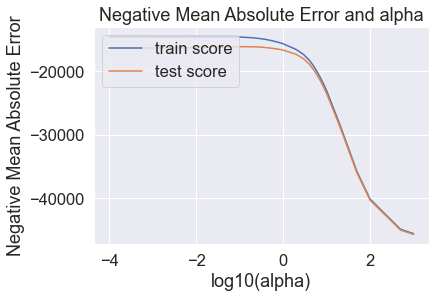

In [85]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log10(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('log10(alpha)')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Alpha = 0
</div>

In [94]:
alpha = 0.0

elasticnet = ElasticNet(alpha=alpha)
        
elasticnet.fit(X_train, Y_train) 

ElasticNet(alpha=0.0)

In [95]:
elasticnet.coef_

array([1045.34, 5038.73, 13229.94, 7070.91, -1137.44, 5536.94, -421.68,
       10525.36, 4055.46, 21692.20, -333.10, 2261.57, 330.20, -3166.11,
       4596.05, -1660.91, 4663.38, 806.69, 1359.49, 449.28, -547.57,
       273.52, 288.96, -15.10, -95.28, 943.24, -286.71, -2261.67,
       -4248.29, 27.96, -607.14, 371.86, 3185.54, 3299.61, 1741.30,
       -3464.28, 3380.20, 611.53, -4440.62, 1928.89, 1347.17, 6309.36,
       2016.48, 1455.40, -5002.73, -3988.23, -1635.58, -2707.88, 1644.57,
       408.03, 4024.42, 668.82, 5781.61, 88.10, -764.30, -1059.36, 842.17,
       -1104.43, -1431.62])

## `Forward Feature Selection`

In [59]:
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic

def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + np.log(n) * num_params
    return bic

In [60]:
features = X_train.columns

regression = LinearRegression()

selected_features = []
min_aic = np.inf
for step in range(1, 16):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], Y_train)
        Y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(Y_test, Y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("At step =", step, "for", step, "features!")
    Y_pred = regression.predict(X_test[selected_features])
    print("Final r-squared: ", round(metrics.r2_score(Y_test, Y_pred),2),"for",step,"features.\n")
    
print("Final",step,"selected features: ", selected_features, "\n\nAIC: ", min_aic, "\nBIC: ", current_bic)

At step = 1 for 1 features!
Final r-squared:  0.12 for 1 features.

At step = 2 for 2 features!
Final r-squared:  0.51 for 2 features.

At step = 3 for 3 features!
Final r-squared:  0.7 for 3 features.

At step = 4 for 4 features!
Final r-squared:  0.72 for 4 features.

At step = 5 for 5 features!
Final r-squared:  0.79 for 5 features.

At step = 6 for 6 features!
Final r-squared:  0.8 for 6 features.

At step = 7 for 7 features!
Final r-squared:  0.81 for 7 features.

At step = 8 for 8 features!
Final r-squared:  0.82 for 8 features.

At step = 9 for 9 features!
Final r-squared:  0.83 for 9 features.

At step = 10 for 10 features!
Final r-squared:  0.83 for 10 features.

At step = 11 for 11 features!
Final r-squared:  0.84 for 11 features.

At step = 12 for 12 features!
Final r-squared:  0.84 for 12 features.

At step = 13 for 13 features!
Final r-squared:  0.85 for 13 features.

At step = 14 for 14 features!
Final r-squared:  0.85 for 14 features.

At step = 15 for 15 features!
Final

<div class="alert alert-block alert-info">
<b>Note:</b> These 15 features give the best R score at 86% which is a good score. More than 15 features gives constant 86%
</div>

In [61]:
#coefficients for the 15 features
regression.coef_

array([29912.44994299, 13618.23391095, 12331.51953304, -7170.33272252,
        6584.14391387,  8129.80401953,  5627.76502054,  5213.26020194,
        4795.07889139,  2163.02511017,  6635.01173497, -2402.96490123,
       -3069.73818286, -8561.45971029, -1021.81764608])

In [62]:
correlation = X[selected_features].corr()

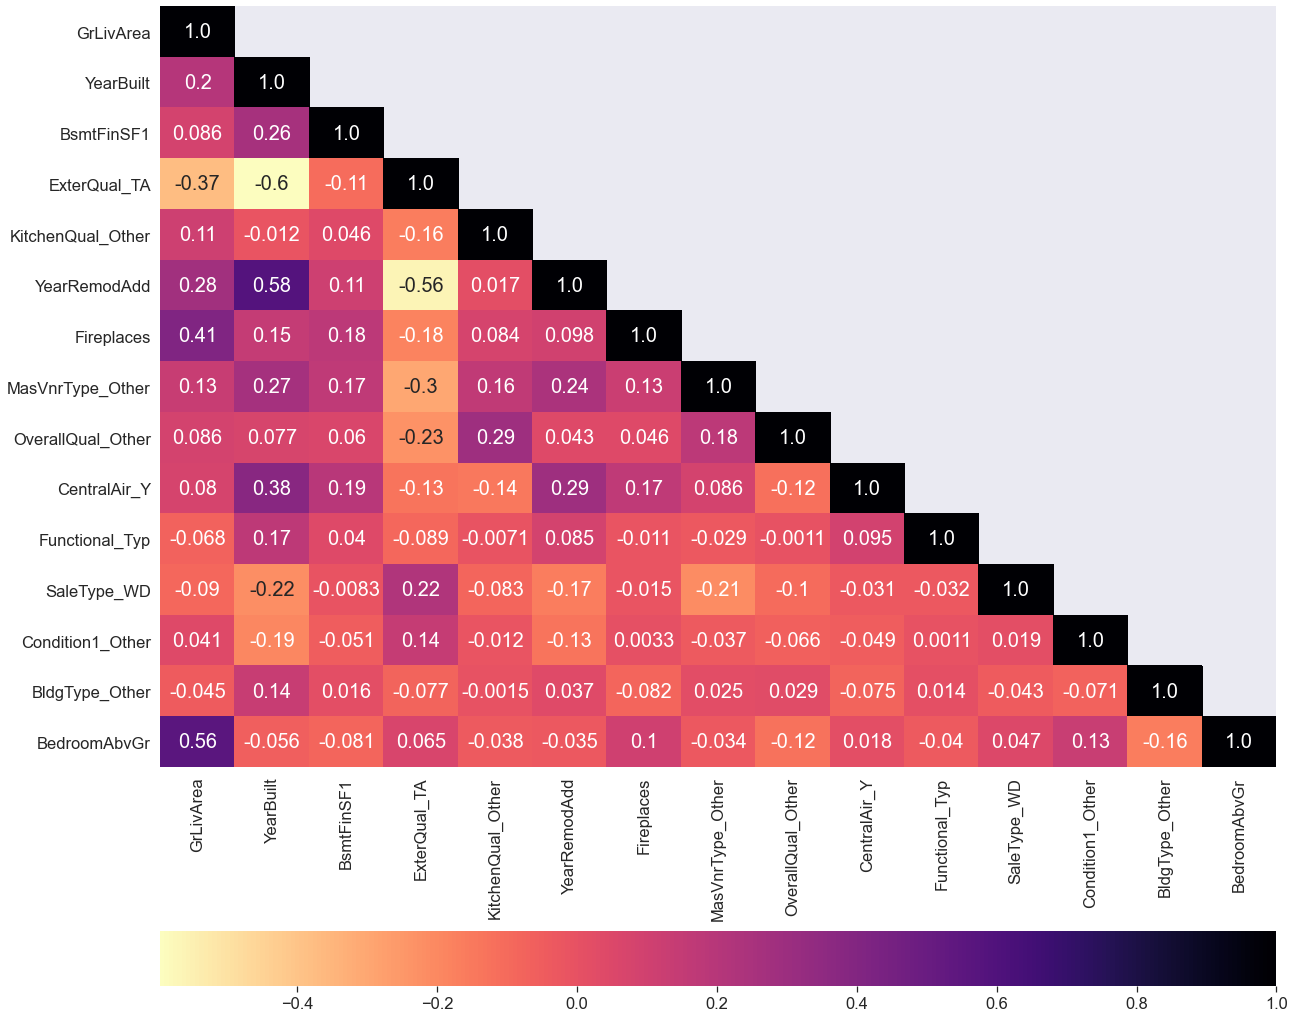

In [63]:
plt.rcParams['font.size'] = 25
plt.figure(figsize=[20,20])
sns.set(font_scale=1.5)
mask = np.zeros(correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask), k=1)] = True
sns.heatmap(correlation, annot=True, cmap='magma_r', annot_kws={"size": 20}, fmt=".2",  mask = mask, 
            cbar_kws = dict(use_gridspec=False,location="bottom"),
            xticklabels=list(correlation.columns.values), yticklabels=list(correlation.columns.values))
#plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Correlation matrix for the final 15.
</div>